Files Downloaded: 0file [00:00, ?file/s]

AttributeError: 'list' object has no attribute 'plot'

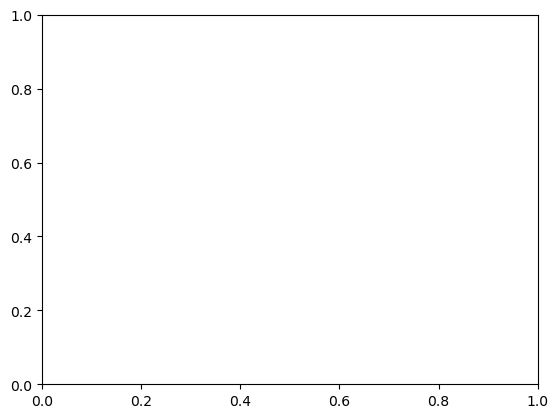

In [305]:
import matplotlib.pyplot as plt
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.time import parse_time
from sunpy.timeseries import TimeSeries

tr = a.Time('2024-05-14 16:00', '2024-05-14 19:00')
results = Fido.search(tr, a.Instrument.xrs & a.goes.SatelliteNumber(17) & a.Resolution("avg1m") | a.hek.FL & (a.hek.FRM.Name == 'SWPC'))

files = Fido.fetch(results)
goes = TimeSeries(files)

hek_results = results['hek']
flares_hek = hek_results[0]

fig, ax = plt.subplots()
goes.plot(axes=ax)
ax.axvline(parse_time(flares_hek['event_peaktime']).datetime)
ax.axvspan(
    parse_time(flares_hek['event_starttime']).datetime,
    parse_time(flares_hek['event_endtime']).datetime,
    alpha=0.2, label=flares_hek['fl_goescls']
)
ax.legend(loc=2)
ax.set_yscale('log')
ax.set_xlim(tr.start.to_datetime(), tr.end.to_datetime())
fig.tight_layout()
plt.show()

In [159]:
from datetime import datetime

# Example datetime strings
datetime_str1 = '2024-05-14 16:49:39'
datetime_str2 = '2024-05-14 17:25:40'

# Convert the strings to datetime objects
format_str = '%Y-%m-%d %H:%M:%S'  # Define the format of the datetime string
datetime_obj1 = datetime.strptime(datetime_str1, format_str)
datetime_obj2 = datetime.strptime(datetime_str2, format_str)

# Calculate the difference between the two datetime objects
time_diff = datetime_obj2 - datetime_obj1

# Get the difference in minutes
diff_in_minutes = time_diff.total_seconds() / 60

# Output the result
print(f"Difference in minutes: {diff_in_minutes:.2f}")

Difference in minutes: 36.02


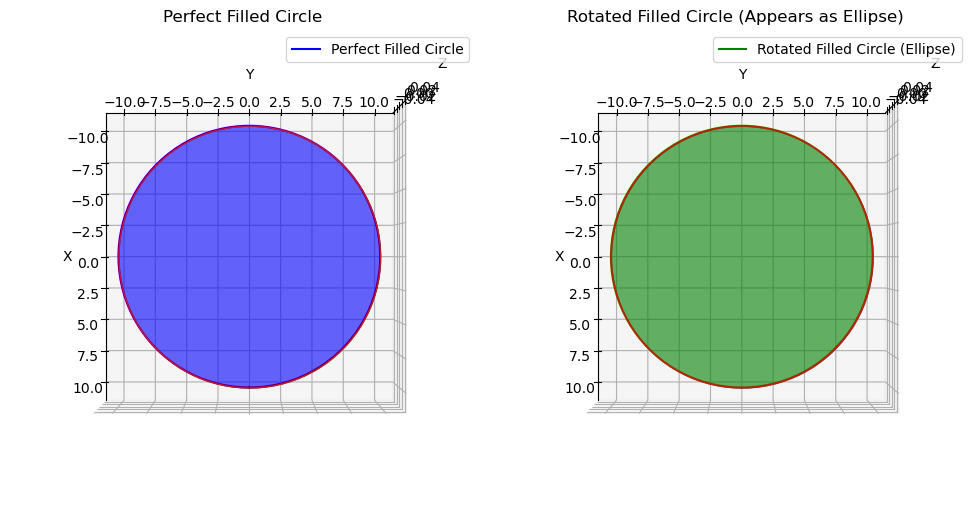

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to calculate rotation matrix around z-axis
def rotation_matrix_z(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta),  np.cos(theta), 0],
                     [0,              0,             1]])

# Function to plot a filled circle (or rotated circle) in 3D
def plot_filled_circle(ax, radius=1, angle=0, color='blue', label="Filled Circle"):
    # Create parametric angles for the circle
    t = np.linspace(0, 2 * np.pi, 100)
    x = radius * np.cos(t)
    y = radius * np.sin(t)
    z = np.zeros_like(t)

    # Combine x, y, z into a 3D array
    points = np.vstack((x, y, z))

    # Rotate the circle if an angle is given
    if angle != 0:
        rotation_matrix = rotation_matrix_z(angle)
        points = np.dot(rotation_matrix, points)

    # Create a 3D polygon to fill the circle
    verts = [list(zip(points[0], points[1], points[2]))]
    ax.add_collection3d(Poly3DCollection(verts, facecolors=color, linewidths=1, edgecolors='r', alpha=0.6))
    ax.plot(points[0], points[1], points[2], label=label, color=color)

# Function to visualize the filled circle and its rotated version
def visualize_filled_circle_and_rotated_ellipse(major_axis, minor_axis):
    # Calculate the rotation angle
    theta_radians = np.arccos(minor_axis / major_axis)

    # Set up the 3D plot
    fig = plt.figure(figsize=[10,5])

    # Plot the original filled circle (before rotation)
    ax1 = fig.add_subplot(121, projection='3d')
    plot_filled_circle(ax1, radius=major_axis, angle=0, color='blue', label="Perfect Filled Circle")
    ax1.set_title("Perfect Filled Circle")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")
    ax1.legend()
    ax1.view_init(elev=30, azim=30)  # Adjust the view for better 3D visualization
    # ax1.set_box_aspect([1, 1, 0.5])  # Equal aspect ratio
    ax1.view_init(elev=90, azim=0)
    
    # Plot the rotated filled circle (which appears as an ellipse)
    ax2 = fig.add_subplot(122, projection='3d')
    plot_filled_circle(ax2, radius=major_axis, angle=theta_radians, color='green', label="Rotated Filled Circle (Ellipse)")
    ax2.set_title(f"Rotated Filled Circle (Appears as Ellipse)")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    ax2.legend()
    ax2.view_init(elev=30, azim=30)  # Adjust the view for better 3D visualization
    # ax2.set_box_aspect([1, 1, 0.5])  # Equal aspect ratio
    # ax2.set_xlim(-3, 3)
    # ax2.set_ylim(-3, 3)
    # ax2.set_zlim(-3, 3)
    ax2.view_init(elev=90, azim=0)

    plt.tight_layout()
    plt.show()

# Example values for major and minor axes
major_axis = 10
minor_axis = 3

# Visualize the filled circle and rotated ellipse
visualize_filled_circle_and_rotated_ellipse(major_axis, minor_axis)

/tmp/ipykernel_3580350/3250819883.py:13: RuntimeWarning: invalid value encountered in arccos
  theta_radians = np.arccos(minor_axis / major_axis)


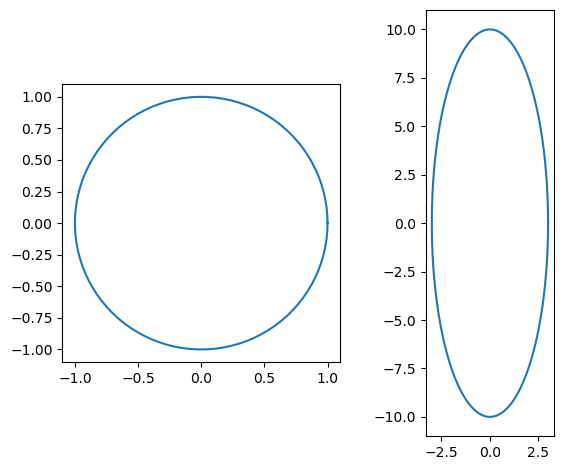

In [190]:
import numpy as np
from matplotlib import pyplot as plt

u = 0      # x-position of the center
v = 0      # y-position of the center
a = 3      # radius on the x-axis
b = 10     # radius on the y-axis

t = np.linspace(0, 2*np.pi, 100)

major_axis    = u + a*np.cos(t)
minor_axis    = v + b*np.sin(t)
theta_radians = np.arccos(minor_axis / major_axis)

# theta (t) goes from 0 to 2pi
r = np.sqrt(1) # radius of the circle
x = r * np.cos(t)
y = r * np.sin(t)

fig = plt.figure()

ax = fig.add_subplot(121)
ax.plot(x, y)
ax.set_aspect(1)

ax = fig.add_subplot(122)
ax.plot(major_axis, minor_axis)
ax.set_aspect(1)

fig.tight_layout()
plt.show()

# print(f'\nMajor axis: {major_axis}')
# print(f'\nMinor axis: {minor_axis}')
# print(f'\nRotation angle: {theta_radians}')

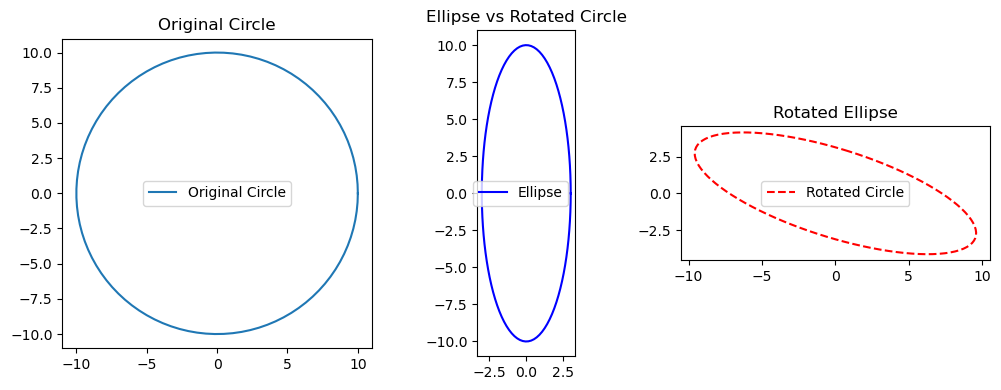

In [296]:
import numpy as np
from matplotlib import pyplot as plt

# Rotation function for 2D points
def rotate_circle(x, y, angle):
    # Rotation matrix for a given angle
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle),  np.cos(angle)]])
    # Apply the rotation matrix
    rotated_coords = np.dot(rotation_matrix, np.vstack((x, y)))
    return rotated_coords[0, :], rotated_coords[1, :]

# Circle parameters
u = 0      # x-position of the center
v = 0      # y-position of the center
a = 3      # minor axis radius (ellipse)
b = 10     # major axis radius (ellipse)

# Parametric angle
t = np.linspace(0, 2*np.pi, 100)

# Create the ellipse
ellipse_x = u + a * np.cos(t)
ellipse_y = v + b * np.sin(t)

# Calculate the angle for rotation (from ellipse to circle)
theta_radians = np.arccos(a / b)  # Angle for rotation based on major and minor axes

# Create the original circle (before rotation)
r        = 10  # Radius of the circle
circle_x = r * np.cos(t)
circle_y = r * np.sin(t)

# Rotate the circle by the calculated angle
# rotated_circle_x, rotated_circle_y = rotate_circle(circle_x, circle_y, theta_radians)
rotated_ellipse_x, rotated_ellipse_y = rotate_circle(ellipse_x, ellipse_y, theta_radians)

# Plotting
fig = plt.figure(figsize=[10,4])

# Plot the original circle
ax1 = fig.add_subplot(131)
ax1.plot(circle_x, circle_y, label='Original Circle')
ax1.set_aspect(1)
ax1.set_title("Original Circle")
ax1.legend()

# Plot the ellipse and the rotated circle for comparison
ax2 = fig.add_subplot(132)
ax2.plot(ellipse_x, ellipse_y, label='Ellipse', color='blue')
ax2.set_aspect(1)
ax2.set_title("Ellipse vs Rotated Circle")
ax2.legend()

ax3 = fig.add_subplot(133)
ax3.plot(rotated_ellipse_x, rotated_ellipse_y, label='Rotated Circle', color='red', linestyle='--')
ax3.set_aspect(1)
ax3.set_title("Rotated Ellipse")
ax3.legend()

fig.tight_layout()
plt.show()

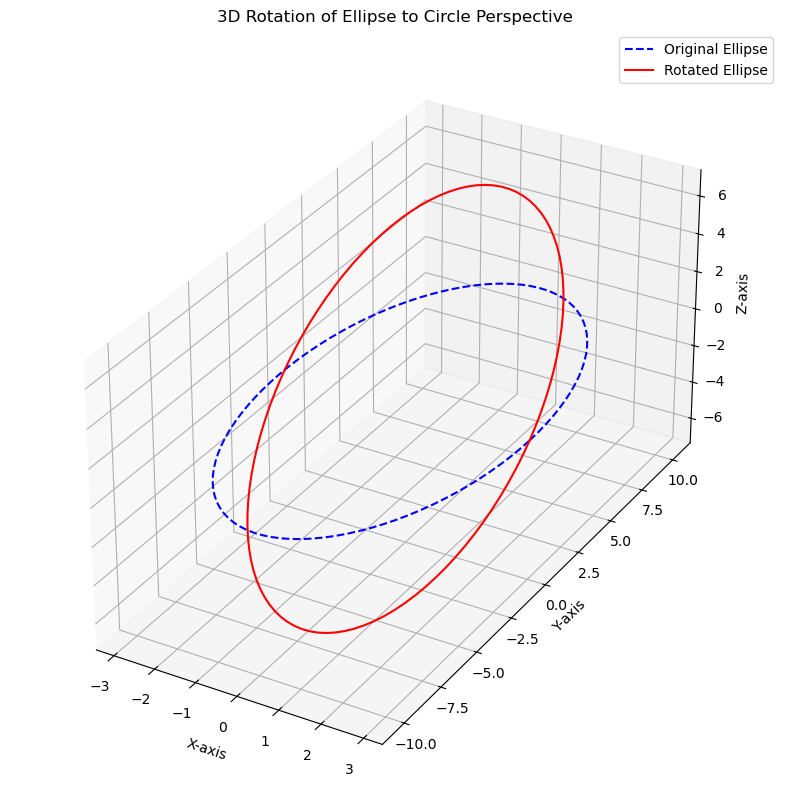

In [298]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the semi-major and semi-minor axes
a = 3  # minor axis radius (ellipse)
b = 10  # major axis radius (ellipse)

# Parametric angle
t = np.linspace(0, 2 * np.pi, 100)

# Create the ellipse in 3D space
u, v = 0, 0  # Center of the ellipse
ellipse_x = u + a * np.cos(t)
ellipse_y = v + b * np.sin(t)
ellipse_z = np.zeros_like(t)  # Set z = 0 for the ellipse

# Combine into a single array for easier manipulation
ellipse_points = np.vstack((ellipse_x, ellipse_y, ellipse_z))

# Define the rotation angle (in radians)
theta = np.radians(45)  # Change this angle as needed

# Define the rotation matrix around the x-axis
R_x = np.array([[1, 0, 0],
                [0, np.cos(theta), -np.sin(theta)],
                [0, np.sin(theta), np.cos(theta)]])

# Apply the rotation
rotated_points = R_x @ ellipse_points

# Extract rotated coordinates
rotated_x = rotated_points[0, :]
rotated_y = rotated_points[1, :]
rotated_z = rotated_points[2, :]

# Plotting the original ellipse and the rotated ellipse
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Original ellipse
ax.plot(ellipse_x, ellipse_y, ellipse_z, label='Original Ellipse', linestyle='--', color='blue')

# Rotated ellipse
ax.plot(rotated_x, rotated_y, rotated_z, label='Rotated Ellipse', color='red')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Rotation of Ellipse to Circle Perspective')
ax.legend()

# Set equal aspect ratio
ax.set_box_aspect([1, 2, 1])  # Aspect ratio is 1:2:1

plt.show()

In [219]:
# Function to calculate the rotation angle (inverse problem)
def calculate_rotation_angle(major_axis, minor_axis):
    return np.arccos(minor_axis / major_axis)
    # return np.arccos(major_axis / minor_axis)
    # return np.arctan2(minor_axis, major_axis)

# Correct the speed based on the rotation angle
def correct_speed(projected_speed, rotation_angle):
    return projected_speed / np.cos(rotation_angle)

# Example: Given major and minor axes of the ellipse
major_axis = 31511.2 # in km
minor_axis = 16382.1 # in km

# Calculate the rotation angle
rotation_angle = calculate_rotation_angle(major_axis, minor_axis)
print(f"Rotation angle (in radians): {rotation_angle:.2f}")
print(f"Rotation angle (in degrees): {np.degrees(rotation_angle):.2f}")

# Example projected speed of the solar plasma flow (from AIA map)
projected_speed = 121.21  # in km/s, example value

# Correct the speed to account for the rotation (projection effect)
real_speed = correct_speed(projected_speed, rotation_angle)
print(f"Corrected real speed: {real_speed:.2f} km/s")

Rotation angle (in radians): 1.02
Rotation angle (in degrees): 58.68
Corrected real speed: 233.15 km/s


In [206]:
np.sqrt(25**2 + 35**2)

43.01162633521314

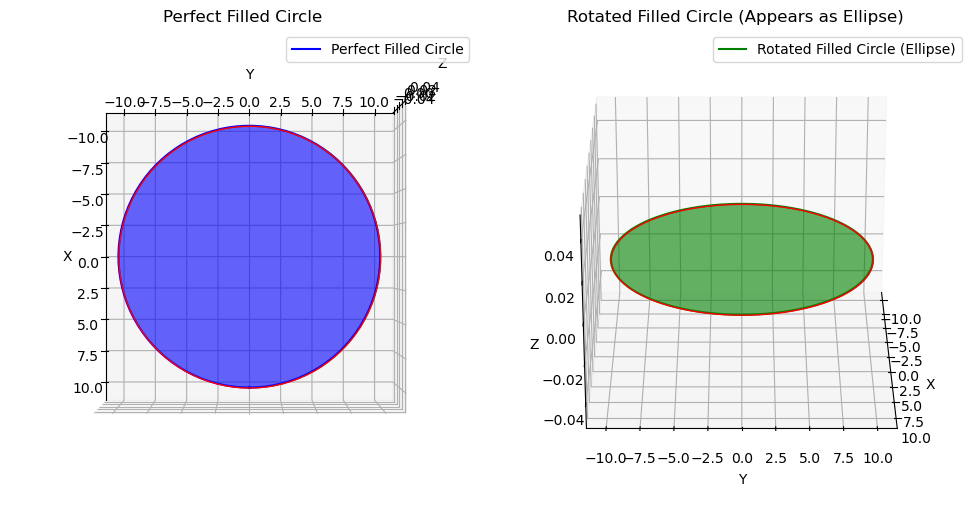

In [294]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to calculate rotation matrix around z-axis
def rotation_matrix_z(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta),  np.cos(theta), 0],
                     [0,              0,             1]])

# Function to plot a filled circle (or rotated circle) in 3D
def plot_filled_circle(ax, radius=1, angle=0, color='blue', label="Filled Circle"):
    # Create parametric angles for the circle
    t = np.linspace(0, 2*np.pi, 100)
    x = radius * np.cos(t)
    y = radius * np.sin(t)
    z = np.zeros_like(t)

    # Combine x, y, z into a 3D array
    points = np.vstack((x, y, z))

    # Rotate the circle if an angle is given
    if angle != 0:
        rotation_matrix = rotation_matrix_z(angle)
        points = np.dot(rotation_matrix, points)

    # Create a 3D polygon to fill the circle
    verts = [list(zip(points[0], points[1], points[2]))]
    ax.add_collection3d(Poly3DCollection(verts, facecolors=color, linewidths=1, edgecolors='r', alpha=0.6))
    ax.plot(points[0], points[1], points[2], label=label, color=color)

# Function to visualize the filled circle and its rotated version
def visualize_filled_circle_and_rotated_ellipse(major_axis, minor_axis):
    # Calculate the rotation angle
    theta_radians = np.arccos(minor_axis / major_axis)

    # Set up the 3D plot
    fig = plt.figure(figsize=[10,5])

    # Plot the original filled circle (before rotation)
    ax1 = fig.add_subplot(121, projection='3d')
    plot_filled_circle(ax1, radius=major_axis, angle=0, color='blue', label="Perfect Filled Circle")
    ax1.set_title("Perfect Filled Circle")
    ax1.legend()
    ax1.view_init(elev=90, azim=0)
    
    # Plot the rotated filled circle (which appears as an ellipse)
    ax2 = fig.add_subplot(122, projection='3d')
    plot_filled_circle(ax2, radius=major_axis, angle=theta_radians, color='green', label="Rotated Filled Circle (Ellipse)")
    ax2.set_title(f"Rotated Filled Circle (Appears as Ellipse)")
    ax2.legend()
    ax2.view_init(elev=25, azim=0)
    
    # Set labels and title
    axes = [ax1, ax2]
    for ax in axes:
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        # ax.set_xlim(-3, 3)
        # ax.set_ylim(-3, 3)
        # ax.set_zlim(-3, 3)
        # ax.set_box_aspect([1, 1, 1])
    
    fig.tight_layout()
    plt.show()

# Example values for major and minor axes
major_axis = 10
minor_axis = 3

# Visualize the filled circle and rotated ellipse
visualize_filled_circle_and_rotated_ellipse(major_axis, minor_axis)

In [299]:
import multiprocessing
num_cores = multiprocessing.cpu_count()  # or specify manually
num_cores

64

In [304]:
labels = {'S1': (105/134, 175/201),
          'S2': (110/134, 135/201),
          'S3': (35/134, 145/201),
          'S4': (30/134, 60/201)}

labels

{'S1': (0.7835820895522388, 0.8706467661691543),
 'S2': (0.8208955223880597, 0.6716417910447762),
 'S3': (0.26119402985074625, 0.7213930348258707),
 'S4': (0.22388059701492538, 0.29850746268656714)}

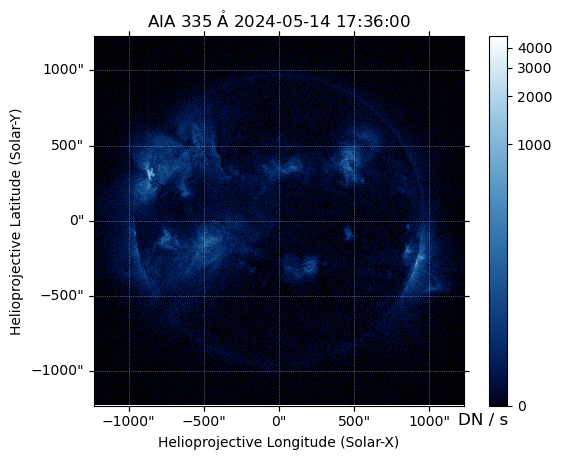

In [105]:
channel = 335
files = sorted(glob.glob(f'{data_dir}/AIA/{channel}A/highres/lv15/*.fits'))
closest_index = find_closest_filename(files, target_datetime)
aia_file = files[closest_index]
m = Map(aia_file)
m.peek()

In [90]:
# m1 = Map(f'/home/mnedal/data/AIA/{channel}A/highres/lv1/aia.lev1.{channel}A_2024_05_14T17_35_59.12Z.image_lev1.fits') # 94A
# m1 = Map(f'/home/mnedal/data/AIA/{channel}A/highres/lv1/aia.lev1.{channel}A_2024_05_14T17_36_09.17Z.image_lev1.fits') # 131A
# m1 = Map(f'/home/mnedal/data/AIA/{channel}A/highres/lv1/aia.lev1.{channel}A_2024_05_14T17_36_00.62Z.image_lev1.fits') # 335A

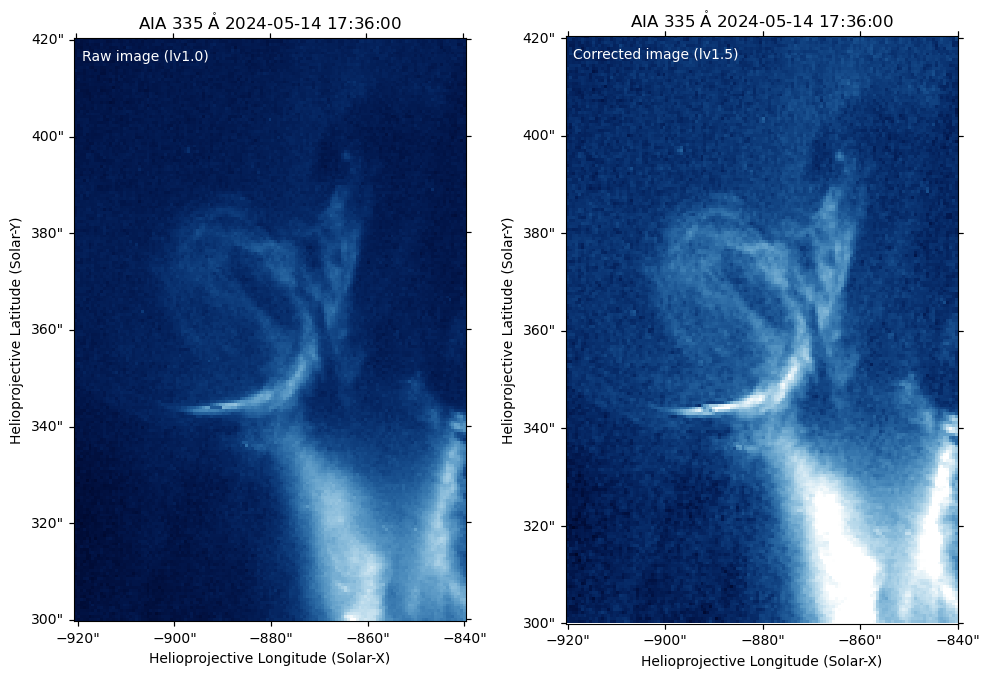

In [87]:
channel = 335
m1 = Map(f'/home/mnedal/data/AIA/{channel}A/highres/lv1/aia.lev1.{channel}A_2024_05_14T17_36_00.62Z.image_lev1.fits')
m2 = Map(f'/home/mnedal/data/AIA/{channel}A/highres/lv15/aia.lev15.{channel}A_2024_05_14T17_36_00.62Z.image_lev15.fits')

if channel == 94:
    norm = ImageNormalize(vmin=0, vmax=2e3, stretch=AsinhStretch())
elif channel == 131:
    norm = ImageNormalize(vmin=0, vmax=10e3, stretch=AsinhStretch())
elif channel == 335:
    norm = ImageNormalize(vmin=0, vmax=10e2, stretch=AsinhStretch())

# crop the region of interest
top_right   = SkyCoord(-840*u.arcsec, 420*u.arcsec, frame=m1.coordinate_frame)
bottom_left = SkyCoord(-920*u.arcsec, 300*u.arcsec, frame=m1.coordinate_frame)

submap1 = m1.submap(bottom_left, top_right=top_right)
submap2 = m2.submap(bottom_left, top_right=top_right)

fig = plt.figure(figsize=[10,7])

ax = fig.add_subplot(121, projection=submap1)
submap1.plot(axes=ax, norm=norm)
ax.grid(False)
ax.text(0.02, 0.98, 'Raw image (lv1.0)', transform=ax.transAxes, fontsize=10, color='white', verticalalignment='top')

ax = fig.add_subplot(122, projection=submap2)
submap2.plot(axes=ax, norm=norm)
ax.grid(False)
ax.text(0.02, 0.98, 'Corrected image (lv1.5)', transform=ax.transAxes, fontsize=10, color='white', verticalalignment='top')

fig.tight_layout()
plt.show()

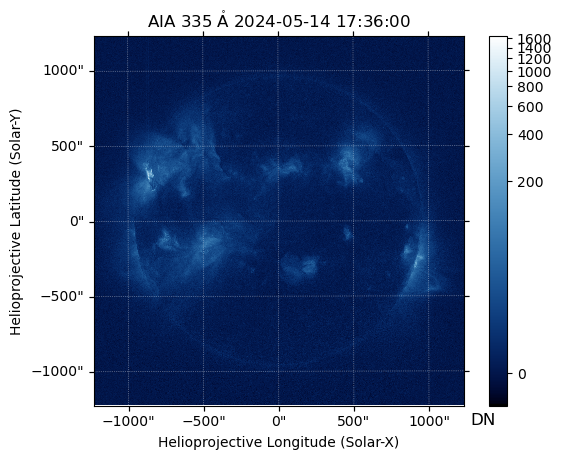

In [77]:
m1.peek()

In [141]:
import pandas as pd
import matplotlib.dates as mdates

df = pd.read_csv('/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_130.csv')
df.head()

,Unnamed: 0,time,distance,x_err,y_err,x_mean,y_mean,distance_km,distance_diff_km,datetime,time_diff_s,speed_km_s
0,0,19857.741721,2364.079332,0.001546,37.413663,19857.741721,2364.079332,1.733109e+06,NaN,2024-05-14 17:48:04.701006+00:00,NaN,NaN
1,1,19857.749948,3660.339476,0.001491,48.611951,19857.749948,3660.339476,2.683399e+06,9.502897e+05,2024-05-14 17:59:55.546952+00:00,710.845946,1336.843408
2,2,19857.758373,5037.803852,0.001464,56.436923,19857.758373,5037.803852,3.693219e+06,1.009821e+06,2024-05-14 18:12:03.453200+00:00,727.906248,1387.294902
3,3,19857.766617,6291.958098,0.001445,71.409859,19857.766617,6291.958098,4.612641e+06,9.194218e+05,2024-05-14 18:23:55.720838+00:00,712.267638,1290.837585
4,4,19857.774910,7188.212211,0.001427,47.279540,19857.774910,7188.212211,5.269686e+06,6.570449e+05,2024-05-14 18:35:52.253552+00:00,716.532714,916.978178


In [145]:
df['datetime']

0    2024-05-14 17:48:04.701006+00:00
1    2024-05-14 17:59:55.546952+00:00
2    2024-05-14 18:12:03.453200+00:00
3    2024-05-14 18:23:55.720838+00:00
4    2024-05-14 18:35:52.253552+00:00
Name: datetime, dtype: object

In [ ]:
# convert distance from arcsec to km
df['distance_km'] = df['distance'] * conversion_factor

# calculate the distance difference in km
df['distance_diff_km'] = df['distance_km'].diff()

# convert time to datetime format
df['datetime'] = [mdates.num2date(t) for t in df['time']]

# calculate the time difference in seconds
df['time_diff_s'] = df['datetime'].diff().dt.total_seconds()

# calculate the speed in km/s
df['speed_km_s'] = df['distance_diff_km'] / df['time_diff_s']

# # drop the first row which will have NaN values for the differences
# df.dropna(inplace=True)

In [76]:
import warnings
warnings.filterwarnings('ignore')
import os
from sunpy.net import Fido
from sunpy.net import attrs as a
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.data.sample
import sunpy.map
from astropy.visualization import ImageNormalize

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

HMI20110607_063211_los_lowres.fits:   0%|          | 0.00/8.40M [00:00<?, ?B/s]

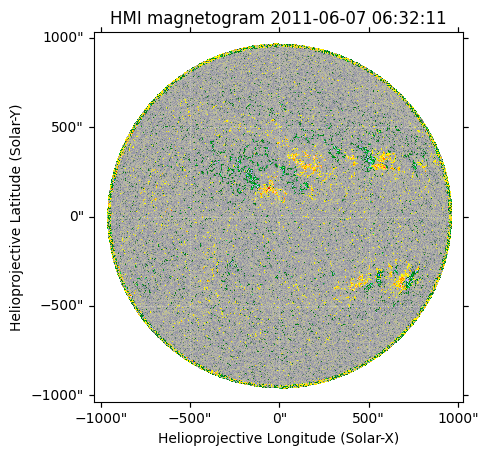

In [3]:
map_hmi = sunpy.map.Map(sunpy.data.sample.HMI_LOS_IMAGE)
map_hmi.plot_settings['cmap'] = "hmimag"
map_hmi.plot_settings['norm'] = plt.Normalize(-1500, 1500)

hmi_rotated = map_hmi.rotate(order=3)
fig = plt.figure()
ax = fig.add_subplot(projection=hmi_rotated)
hmi_rotated.plot(axes=ax)
plt.show()

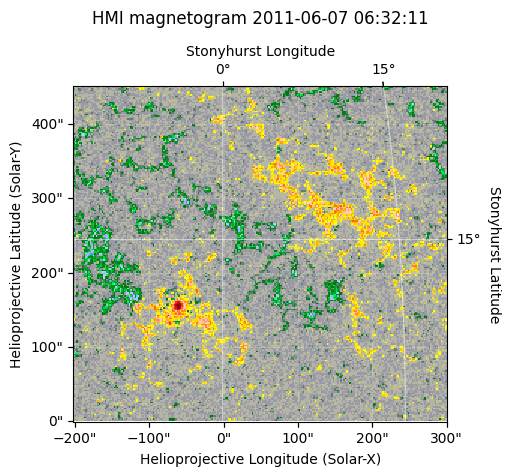

In [8]:
top_right = SkyCoord(300 * u.arcsec, 450 * u.arcsec, frame=hmi_rotated.coordinate_frame)
bottom_left = SkyCoord(-200 * u.arcsec, 0 * u.arcsec, frame=hmi_rotated.coordinate_frame)
hmi_submap = hmi_rotated.submap(bottom_left, top_right=top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=hmi_submap)
image = hmi_submap.plot(axes=ax)
hmi_submap.draw_limb(axes=ax)
hmi_submap.draw_grid(axes=ax)
# Make some room and put the title at the top of the figure
ax.set_position([0.1, 0.1, 0.8, 0.7])
ax.set_title(ax.get_title(), pad=45)
plt.show()

In [20]:
import drms

c = drms.Client()
c.series(r'hmi\.sharp_')

['hmi.sharp_720s',
 'hmi.sharp_720s_dconS',
 'hmi.sharp_720s_nrt',
 'hmi.sharp_cea_720s',
 'hmi.sharp_cea_720s_dconS',
 'hmi.sharp_cea_720s_nrt']

In [28]:
si = c.info('hmi.sharp_cea_720s')

In [29]:
[x for x in dir(si) if not x.startswith('_')]

['archive',
 'dbindex',
 'keywords',
 'links',
 'name',
 'note',
 'primekeys',
 'retention',
 'segments',
 'tapegroup',
 'unitsize']

In [30]:
si.segments

,type,units,protocol,dims,note
name,,,,,
magnetogram,int,Gauss,fits,VARxVAR,Line-of-sight magnetogram in CEA projection
bitmap,char,Enumerated,fits,VARxVAR,Mask for the patch in CEA coordinates
Dopplergram,int,m/s,fits,VARxVAR,Dopplergram in CEA projection
continuum,int,DN/s,fits,VARxVAR,Intensitygram in CEA projection
Bp,int,Gauss,fits,VARxVAR,"B_phi, positive westward"
Bt,int,Gauss,fits,VARxVAR,"B_theta, positive southward"
Br,int,Gauss,fits,VARxVAR,"B_r, positive up"
Bp_err,int,Gauss,fits,VARxVAR,Standard deviation of B_phi
Bt_err,int,Gauss,fits,VARxVAR,Standard deviation of B_theta


In [35]:
keys = c.query('hmi.sharp_cea_720s[][2022.05.14_17:30 - 2022.05.14_19:30]', key='T_REC, HARPNUM, NOAA_ARS, Bp, Bt, Br')
keys['Br'][0]

'Invalid KeyLink'

In [ ]:
sharp_map = sunpy.map.Map(file)
fig = plt.figure()
ax = fig.add_subplot(projection=sharp_map)
sharp_map.plot(axes=ax, vmin=-1500, vmax=1500)
plt.show()

In [10]:
hmi_submap.save('/home/mnedal/data/hmi_test.fits', filetype='auto')

In [43]:
# [x for x in dir(a.jsoc.Segment) if not x.startswith('_')]

In [44]:
jsoc_email = 'mnedal@nao-rozhen.org'
# jsoc_email = 'mohamed.nedal.solar@gmail.com'

result_bp = Fido.search(a.Time("2011-03-09 23:20:00", "2011-03-09 23:30:00"),
                     a.Sample(1*u.hour),
                     a.jsoc.Series("hmi.sharp_cea_720s"),
                     a.jsoc.PrimeKey("HARPNUM", 401),
                     a.jsoc.Notify(jsoc_email),
                     a.jsoc.Segment("Bp"))
print(result)
Bp = Fido.fetch(result_bp)

result_br = Fido.search(a.Time("2011-03-09 23:20:00", "2011-03-09 23:30:00"),
                     a.Sample(1*u.hour),
                     a.jsoc.Series("hmi.sharp_cea_720s"),
                     a.jsoc.PrimeKey("HARPNUM", 401),
                     a.jsoc.Notify(jsoc_email),
                     a.jsoc.Segment("Br"))
print(result)
Br = Fido.fetch(result_br)

result_bt = Fido.search(a.Time("2011-03-09 23:20:00", "2011-03-09 23:30:00"),
                     a.Sample(1*u.hour),
                     a.jsoc.Series("hmi.sharp_cea_720s"),
                     a.jsoc.PrimeKey("HARPNUM", 401),
                     a.jsoc.Notify(jsoc_email),
                     a.jsoc.Segment("Bt"))
print(result)
Bt = Fido.fetch(result_bt)

Results from 1 Provider:

1 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

         T_REC          TELESCOP  INSTRUME WAVELNTH CAR_ROT
----------------------- -------- --------- -------- -------
2011.03.09_23:24:00_TAI  SDO/HMI HMI_SIDE1   6173.0    2107




2024-09-11 08:02:29 - drms - INFO: Export request pending. [id=JSOC_20240911_000687, status=2]
2024-09-11 08:02:29 - drms - INFO: Waiting for 0 seconds...
2024-09-11 08:02:30 - sunpy - INFO: 1 URLs found for download. Full request totaling 1MB


INFO: 1 URLs found for download. Full request totaling 1MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Results from 1 Provider:

1 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

         T_REC          TELESCOP  INSTRUME WAVELNTH CAR_ROT
----------------------- -------- --------- -------- -------
2011.03.09_23:24:00_TAI  SDO/HMI HMI_SIDE1   6173.0    2107




2024-09-11 08:02:45 - drms - INFO: Export request pending. [id=JSOC_20240911_001164, status=2]
2024-09-11 08:02:45 - drms - INFO: Waiting for 0 seconds...
2024-09-11 08:02:45 - drms - INFO: Export request pending. [id=JSOC_20240911_001164, status=1]
2024-09-11 08:02:45 - drms - INFO: Waiting for 5 seconds...
2024-09-11 08:02:51 - drms - INFO: Export request pending. [id=JSOC_20240911_001164, status=1]
2024-09-11 08:02:51 - drms - INFO: Waiting for 5 seconds...
2024-09-11 08:02:56 - drms - INFO: Export request pending. [id=JSOC_20240911_001164, status=1]
2024-09-11 08:02:56 - drms - INFO: Waiting for 5 seconds...
2024-09-11 08:03:02 - drms - INFO: Export request pending. [id=JSOC_20240911_001164, status=1]
2024-09-11 08:03:02 - drms - INFO: Waiting for 5 seconds...
2024-09-11 08:03:07 - sunpy - INFO: 1 URLs found for download. Full request totaling 1MB


INFO: 1 URLs found for download. Full request totaling 1MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.sharp_cea_720s.401.20110309_232400_TAI.Br.fits:   0%|          | 0.00/501k [00:00<?, ?B/s]

Results from 1 Provider:

1 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

         T_REC          TELESCOP  INSTRUME WAVELNTH CAR_ROT
----------------------- -------- --------- -------- -------
2011.03.09_23:24:00_TAI  SDO/HMI HMI_SIDE1   6173.0    2107




2024-09-11 08:03:23 - drms - INFO: Export request pending. [id=JSOC_20240911_001166, status=2]
2024-09-11 08:03:23 - drms - INFO: Waiting for 0 seconds...
2024-09-11 08:03:24 - drms - INFO: Export request pending. [id=JSOC_20240911_001166, status=1]
2024-09-11 08:03:24 - drms - INFO: Waiting for 5 seconds...
2024-09-11 08:03:29 - drms - INFO: Export request pending. [id=JSOC_20240911_001166, status=1]
2024-09-11 08:03:29 - drms - INFO: Waiting for 5 seconds...
2024-09-11 08:03:35 - drms - INFO: Export request pending. [id=JSOC_20240911_001166, status=1]
2024-09-11 08:03:35 - drms - INFO: Waiting for 5 seconds...
2024-09-11 08:03:40 - sunpy - INFO: 1 URLs found for download. Full request totaling 1MB


INFO: 1 URLs found for download. Full request totaling 1MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.sharp_cea_720s.401.20110309_232400_TAI.Bt.fits:   0%|          | 0.00/530k [00:00<?, ?B/s]

(382, 733)


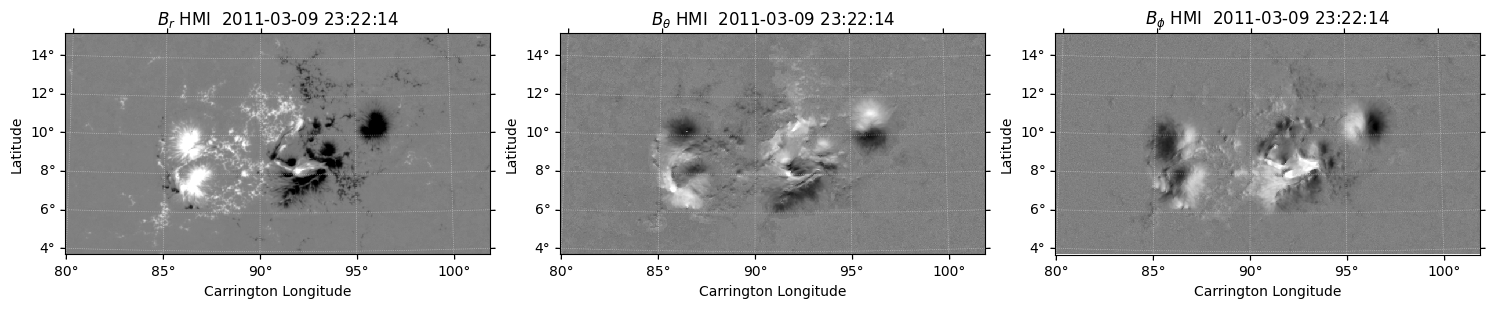

In [93]:
sharp_map_br = sunpy.map.Map(Br)
sharp_map_bt = sunpy.map.Map(Bt)
sharp_map_bp = sunpy.map.Map(Bp)

print(sharp_map_br.data.shape)

sharp_map_br.plot_settings['norm'] = ImageNormalize(vmin=-1500, vmax=1500)
sharp_map_bt.plot_settings['norm'] = ImageNormalize(vmin=-1500, vmax=1500)
sharp_map_bp.plot_settings['norm'] = ImageNormalize(vmin=-1500, vmax=1500)

fig = plt.figure(figsize=[15,7])

ax = fig.add_subplot(131, projection=sharp_map_br)
sharp_map_br.plot(axes=ax)
ax.set_title(rf"$B_r$ {sharp_map_br.latex_name.replace('hmi','')}")

ax = fig.add_subplot(132, projection=sharp_map_bt)
sharp_map_bt.plot(axes=ax)
ax.set_title(rf"$B_\theta$ {sharp_map_bt.latex_name.replace('hmi','')}")

ax = fig.add_subplot(133, projection=sharp_map_bp)
sharp_map_bp.plot(axes=ax)
ax.set_title(rf"$B_\phi$ {sharp_map_bp.latex_name.replace('hmi','')}")

fig.tight_layout()
plt.show()

In [ ]:
# resized: 128, 256 pix
# cut-off @ ± 2000 G

(55, 105)


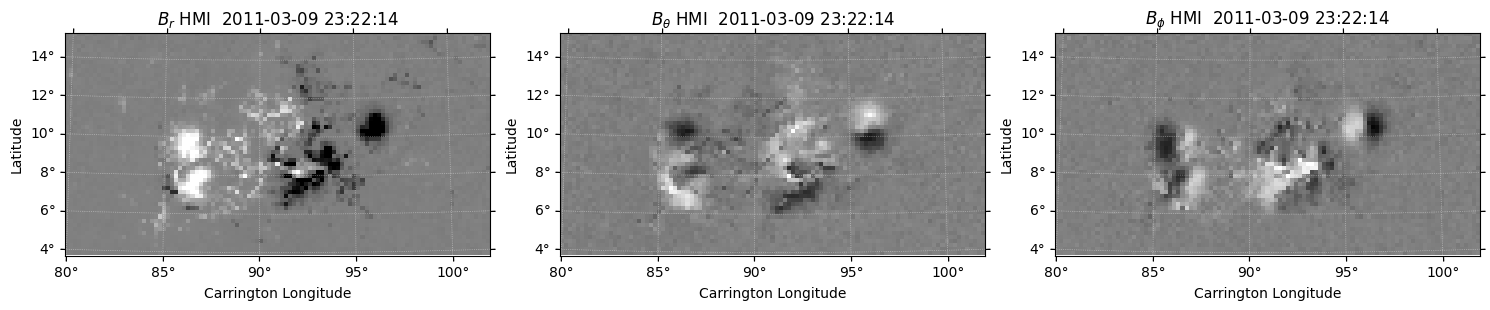

In [94]:
new_x_dim = sharp_map_bt.data.shape[1]/7
new_y_dim = sharp_map_bt.data.shape[0]/7

sharp_map_br_resampled = sharp_map_br.resample([new_x_dim, new_y_dim]*u.pix)
sharp_map_bt_resampled = sharp_map_bt.resample([new_x_dim, new_y_dim]*u.pix)
sharp_map_bp_resampled = sharp_map_bp.resample([new_x_dim, new_y_dim]*u.pix)

print(sharp_map_br_resampled.data.shape)

sharp_map_br_resampled.plot_settings['norm'] = ImageNormalize(vmin=-1500, vmax=1500)
sharp_map_bt_resampled.plot_settings['norm'] = ImageNormalize(vmin=-1500, vmax=1500)
sharp_map_bp_resampled.plot_settings['norm'] = ImageNormalize(vmin=-1500, vmax=1500)

fig = plt.figure(figsize=[15,7])

ax = fig.add_subplot(131, projection=sharp_map_br_resampled)
sharp_map_br_resampled.plot(axes=ax)
ax.set_title(rf"$B_r$ {sharp_map_br_resampled.latex_name.replace('hmi','')}")

ax = fig.add_subplot(132, projection=sharp_map_bt_resampled)
sharp_map_bt_resampled.plot(axes=ax)
ax.set_title(rf"$B_\theta$ {sharp_map_bt_resampled.latex_name.replace('hmi','')}")

ax = fig.add_subplot(133, projection=sharp_map_bp_resampled)
sharp_map_bp_resampled.plot(axes=ax)
ax.set_title(rf"$B_\phi$ {sharp_map_bp_resampled.latex_name.replace('hmi','')}")

fig.tight_layout()
plt.show()

In [95]:
sharp_map_br_resampled.save('/home/mnedal/data/sharp_map_br_resampled.fits', filetype='auto')
sharp_map_bt_resampled.save('/home/mnedal/data/sharp_map_bt_resampled.fits', filetype='auto')
sharp_map_bp_resampled.save('/home/mnedal/data/sharp_map_bp_resampled.fits', filetype='auto')

In [14]:
import sunpy.map
from astropy import units as u
from sunpy.net import Fido, attrs as a

result = Fido.search(a.Time('2024-05-14 17:00:00', '2024-05-14 17:00:20'),
                         a.Instrument('AIA'),
                         a.Wavelength(193*u.angstrom),
                         a.Sample(12*u.second))
print(result)
files = Fido.fetch(result[0])

Results from 1 Provider:

2 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 135.578 Mbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2024-05-14 17:00:07.000 2024-05-14 17:00:08.000    SDO ...    FULLDISK 64.64844
2024-05-14 17:00:16.000 2024-05-14 17:00:17.000    SDO ...    FULLDISK 64.64844




Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

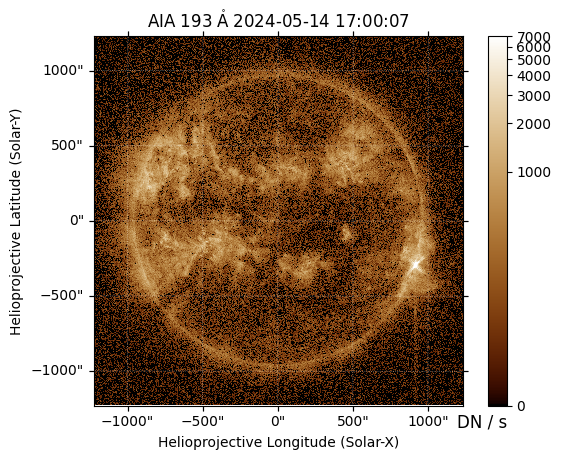

In [20]:
m = sunpy.map.Map(files[0])
m = m/m.exposure_time
m.peek(vmin=0, vmax=7e3)

In [21]:
result = Fido.search(a.Time('2024-05-14 17:00', '2024-05-14 17:01'),
                         a.Instrument('AIA'),
                         a.Wavelength(193*u.angstrom),
                         a.Sample(1*u.min))
print(result)
files = Fido.fetch(result[0])

Results from 1 Provider:

1 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 67.789 Mbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2024-05-14 17:00:07.000 2024-05-14 17:00:08.000    SDO ...    FULLDISK 64.64844




Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

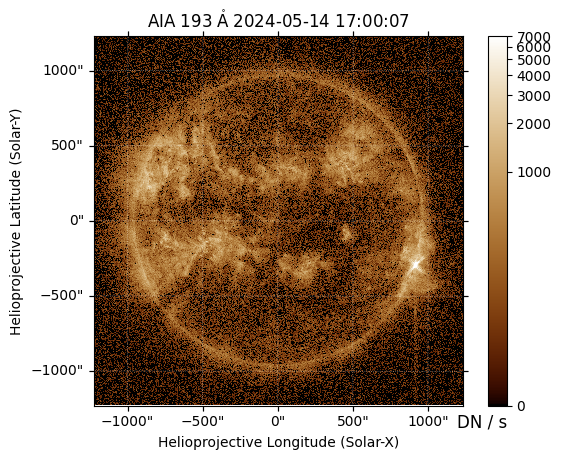

In [22]:
m = sunpy.map.Map(files[0])
m = m/m.exposure_time
m.peek(vmin=0, vmax=7e3)

In [ ]:
# %matplotlib notebook

import matplotlib
matplotlib.use('nbAgg')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
from scipy.interpolate import UnivariateSpline
import astropy.io.fits as fits
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.map
from sunkit_instruments import suvi
from scipy import stats
import sunpy.sun.constants as const
from PIL import Image
import matplotlib.colors as colors
from astropy.visualization import ImageNormalize, SqrtStretch, LogStretch

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

In [ ]:
# Function to create random images
def create_random_image(height, width):
    return np.random.rand(height, width)

# Number of images
height, width = 20, 20
titles = ["log(T)", "log(EM)", "AIA 171 A", "Hα", "Ca II K"]
num_images = len(titles)


# Create a list of random images
images = [create_random_image(height, width) for _ in range(num_images)]

# Create 3D plot
fig = plt.figure(figsize=[10,30])
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# Adjust the spacing between the layers
spacing = 10      # Change this value to adjust spacing
text_spacing = 2  # Spacing between text and layers

# Function to plot an image at a specific layer
def plot_image(ax, img, layer, spacing):
    x, y = np.mgrid[0:img.shape[1], 0:img.shape[0]]
    x = x.T
    y = y.T
    z = np.ones_like(x) * layer * spacing
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(img/img.max()), shade=False)
    return x, y, z

# Plot each random image in its layer
for i, img in enumerate(images):
    x, y, z = plot_image(ax, img, i, spacing)
    # ax.text(x.shape[1], y.shape[0]//2, i*spacing, f'Layer {i + 1}', color='black')
    ax.text(x[0,0] - text_spacing, y[0,0], i * spacing, f'{titles[0]}', color='black', fontsize=10, ha='right', va='center')


# Set labels and view angle
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Layer')
ax.view_init(elev=30, azim=-60)  # Adjust the elevation and azimuth to get a better view

limits = 15
ax.set_xlim(0, limits)
ax.set_ylim(0, limits)
ax.set_zlim(0, limits*num_images + spacing)
ax.set_box_aspect([limits, limits, limits*num_images])
# ax.set_box_aspect([1, 1, (limits*num_images + spacing) / limits])

# Hide the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()

In [ ]:
# # Set aspect ratio and limits
# limits = 20
# ax.set_xlim(0, limits)
# ax.set_ylim(0, limits)
# ax.set_zlim(0, limits * num_images + spacing)
# ax.set_box_aspect([1, 1, (limits * num_images + spacing) / limits])

# # Hide the axes
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

In [1]:
import hvpy
import matplotlib.pyplot as plt
import sunpy.map
from sunpy.time import parse_time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import glob
from sunpy.net import Fido, attrs as a
import sunpy.map
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
from sunpy.coordinates import frames, get_body_heliographic_stonyhurst, get_horizons_coord

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

In [4]:
YEAR = '2024'
MONTH = '05'
DAY = '14'
start_hour = '16'
end_hour = '23'
start_minute = '00'
end_minute = '59'

In [ ]:
# # COR1_A, COR2_A, LASCO_C2, LASCO_C3
# instrument = 'COR1_A'

# try:
#     os.makedirs(f'{dirpath}/{instrument}/', exist_ok=True)
# except:
#     pass

# # Define the start and end datetimes
# start_datetime = datetime(2024, 5, 14, 16, 30)
# end_datetime = datetime(2024, 5, 14, 23, 59)

# # Generate the list of datetimes using list comprehension
# datetimes = [start_datetime + timedelta(minutes=x) for x in range(int((end_datetime - start_datetime).total_seconds() / 60) + 1)]

# for date in datetimes:
#     YEAR, MONTH, DAY = str(date).split(' ')[0].split('-')
#     start_hour, start_minute, _ = str(date).split(' ')[1].split(':')

In [ ]:
data = hvpy.getJP2Image(parse_time('2013-05-13 13:00:00').datetime, hvpy.DataSource['LASCO_C3'].value)
file = hvpy.save_file(data, './test_lasco_c3.jp2', overwrite=True)

m = sunpy.map.Map(file)
m.meta['bunit'] = 'ct'
m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=250)

crop_length = 5000
top_right = SkyCoord(crop_length * u.arcsec, crop_length * u.arcsec, frame=m.coordinate_frame)
bottom_left = SkyCoord(-crop_length * u.arcsec, -crop_length * u.arcsec, frame=m.coordinate_frame)
submap = m.submap(bottom_left, top_right=top_right)


fig = plt.figure(figsize=[20,7])

ax = fig.add_subplot(131, projection=m)
m.plot(axes=ax)
m.draw_limb()
pixel_coords = m.wcs.world_to_pixel(m.center)
x_pixel, y_pixel = pixel_coords
ax.axvline(x=x_pixel, color='w', linestyle='--', alpha=0.5)
ax.axhline(y=y_pixel, color='w', linestyle='--', alpha=0.5)
ax.scatter(x_pixel, y_pixel, c='r', s=20)
ax.grid(False)

ax = fig.add_subplot(132, projection=m)
m.plot(axes=ax)
m.draw_limb()
pixel_coords = m.wcs.world_to_pixel(m.center)
x_pixel, y_pixel = pixel_coords
ax.axvline(x=x_pixel, color='w', linestyle='--', alpha=0.5)
ax.axhline(y=y_pixel, color='w', linestyle='--', alpha=0.5)
ax.scatter(x_pixel, y_pixel, c='r', s=20)
ax.grid(False)
ax.set_xlim(400, 650)
ax.set_ylim(400, 650)

ax = fig.add_subplot(133, projection=submap)
submap.plot(axes=ax)
submap.draw_limb()
pixel_coords = submap.wcs.world_to_pixel(submap.center)
x_pixel, y_pixel = pixel_coords
ax.axvline(x=x_pixel, color='w', linestyle='--', alpha=0.5)
ax.axhline(y=y_pixel, color='w', linestyle='--', alpha=0.5)
ax.scatter(x_pixel, y_pixel, c='w', s=20)
ax.grid(False)

plt.show()

In [ ]:
def split_datetime(start=None, end=None):
    
    START_DATE, START_TIME = start.split('T')
    END_DATE, END_TIME = end.split('T')

    START_YEAR, START_MONTH, START_DAY = START_DATE.split('-')
    END_YEAR, END_MONTH, END_DAY = END_DATE.split('-')

    START_HOUR, START_MINUTE, START_SECOND = START_TIME.split(':')
    END_HOUR, END_MINUTE, END_SECOND = END_TIME.split(':')

    datetime_dict = {
        'start_year': START_YEAR,
        'start_month': START_MONTH,
        'start_day': START_DAY,
        'start_hour': START_HOUR,
        'start_minute': START_MINUTE,
        'start_second': START_SECOND,
        
        'end_year': END_YEAR,
        'end_month': END_MONTH,
        'end_day': END_DAY,
        'end_hour': END_HOUR,
        'end_minute': END_MINUTE,
        'end_second': END_SECOND
    }
    return datetime_dict




def plot_line(angle_deg=None, length=None, map_obj=None):
    """
    Plot a straight line at an angle in degrees from the solar West.
    """
    angle_rad = np.deg2rad(angle_deg)

    # Define the length of the line (in arcseconds)
    line_length = length * u.arcsec

    # Define the center point of the line (e.g., the center of the map)
    center = map_obj.center

    # Calculate the start and end points of the line
    start_point = SkyCoord(center.Tx, center.Ty, frame=map_obj.coordinate_frame)
    end_point = SkyCoord(center.Tx + line_length * np.cos(angle_rad),
                        center.Ty + line_length * np.sin(angle_rad),
                        frame=map_obj.coordinate_frame)
    
    line = SkyCoord([start_point, end_point])
    return line



def generate_centered_list(center, difference, num_elements):
    """
    Generate a list of numbers centered around a given number with a specified difference
    between consecutive numbers.

    Parameters:
    center (int): The central number around which the list is generated.
    difference (int): The difference between consecutive numbers in the list.
    num_elements (int): The number of elements before and after the central number.

    Returns:
    list: A list of numbers centered around the specified central number.
    """
    return [center + difference * i for i in range(-num_elements, num_elements + 1)]



def remove_redundant_maps(maps):
    """
    Remove redundant SunPy maps, keeping only one map per unique timestamp.

    Parameters:
    maps (list): List of SunPy Map objects. Each map is expected to have a 'date-obs' 
                 key in its metadata that provides the observation timestamp.

    Returns:
    list: A list of unique SunPy Map objects, one per unique timestamp.
    
    Example:
    >>> unique_maps = remove_redundant_maps(list_of_sunpy_maps)
    """
    unique_maps = {}
    for m in maps:
        timestamp = m.latex_name
        if timestamp not in unique_maps:
            unique_maps[timestamp] = m
    return list(unique_maps.values())



def apply_runratio(maps):
    """
    Apply running-ratio image technique on EUV images.
    See: https://iopscience.iop.org/article/10.1088/0004-637X/750/2/134/pdf
        Inputs: list of EUV sunpy maps.
        Output: sequence of run-ratio sunpy maps.
    """
    runratio = [m / prev_m.quantity for m, prev_m in zip(maps[1:], maps[:-1])]
    m_seq_runratio = sunpy.map.Map(runratio, sequence=True)
    
    for m in m_seq_runratio:
        m.data[np.isnan(m.data)] = 1
        m.plot_settings['norm'] = colors.Normalize(vmin=0, vmax=2)
        m.plot_settings['cmap'] = 'Greys_r'
    
    return m_seq_runratio



def enhance_contrast(image, vmin, vmax):
    """
    Enhance contrast by clipping and normalization.
    """
    image_clipped = np.clip(image, vmin, vmax)
    image_normalized = (image_clipped - vmin) / (vmax - vmin)
    return image_normalized



def calculate_percentiles(image, lower_percentile=3, upper_percentile=97):
    """
    Calculate vmin and vmax based on the 1st and 99th percentiles.
    """
    vmin = np.percentile(image, lower_percentile)
    vmax = np.percentile(image, upper_percentile)
    return vmin, vmax



def round_obstime(time=None):
    """
    Round the observation time to put it in the image title.
    Input : str, time (HH:MM:SS.sss)
    Output: str, datetime (YYYY-mm-DD HH:MM:SS)
    """
    from datetime import datetime, timedelta

    original_time_str = time

    # Convert the original time string to a datetime object
    original_time = datetime.strptime(original_time_str, '%H:%M:%S.%f')

    # Round the time to the nearest second
    rounded_time = original_time + timedelta(seconds=round(original_time.microsecond / 1e6))

    # Format the rounded time as 'HH:MM:SS'
    rounded_time_str = rounded_time.strftime('%H:%M:%S')
    
    return rounded_time_str



def load_lasco(start=None, end=None, detector='C2'):
    """
    Load SOHO/LASCO C2 or C3 images as sunpy maps.
    """
    dt_dict = split_datetime(start=start, end=end)
    data = sorted(glob.glob(f"{data_dir}/LASCO_{detector}/LASCO_{detector}_{dt_dict['start_year']}{dt_dict['start_month']}{dt_dict['start_day']}*.jp2"))
    
    start_file_to_find = f"{data_dir}/LASCO_{detector}/LASCO_{detector}_{dt_dict['end_year']}{dt_dict['start_month']}{dt_dict['start_day']}T{dt_dict['start_hour']}{dt_dict['start_minute']}.jp2"
    end_file_to_find = f"{data_dir}/LASCO_{detector}/LASCO_{detector}_{dt_dict['end_year']}{dt_dict['end_month']}{dt_dict['end_day']}T{dt_dict['end_hour']}{dt_dict['end_minute']}.jp2"
    
    idx1 = data.index(start_file_to_find)
    idx2 = data.index(end_file_to_find)
    chosen_files = data[idx1:idx2]
    
    map_objects = []
    for i, file in enumerate(chosen_files):
        m = sunpy.map.Map(file)
        m.meta['bunit'] = 'ct' # a workaround for C2 jp2 images
        m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=250)
        map_objects.append(m)
        print(f'LASCO {detector} image {i} is done')
    return map_objects

In [ ]:
centered_list = generate_centered_list(160, 5, 7)

In [ ]:
import hvpy
import numpy as np
import matplotlib.pyplot as plt
import sunpy.map
from sunpy.time import parse_time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize


data = hvpy.getJP2Image(parse_time('2013-05-13 13:00:00').datetime, hvpy.DataSource['LASCO_C3'].value)
file = hvpy.save_file(data, './test_lasco_c3.jp2', overwrite=True)

m = sunpy.map.Map(file)
m.meta['bunit'] = 'ct'
m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=250)

crop_length = 5000
top_right = SkyCoord(crop_length * u.arcsec, crop_length * u.arcsec, frame=m.coordinate_frame)
bottom_left = SkyCoord(-crop_length * u.arcsec, -crop_length * u.arcsec, frame=m.coordinate_frame)
submap = m.submap(bottom_left, top_right=top_right)


fig = plt.figure(figsize=[20,7])

ax = fig.add_subplot(131, projection=m)
m.plot(axes=ax)
m.draw_limb()
pixel_coords = m.wcs.world_to_pixel(m.center)
x_pixel, y_pixel = pixel_coords
ax.axvline(x=x_pixel, color='w', linestyle='--', alpha=0.5)
ax.axhline(y=y_pixel, color='w', linestyle='--', alpha=0.5)
ax.scatter(x_pixel, y_pixel, c='r', s=20)
ax.grid(False)
for value in centered_list:
    line = plot_line(angle_deg=value, length=20000, map_obj=m)
    ax.plot_coord(line, color='w')
    
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = m.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=m.coordinate_frame))
    
    # Display the number at the end point
    ax.text(end_point_pixel.x.value, end_point_pixel.y.value, f'{value}$^o$',
            color='w', fontsize=10, ha='center', va='center')

ax = fig.add_subplot(132, projection=m)
m.plot(axes=ax)
m.draw_limb()
pixel_coords = m.wcs.world_to_pixel(m.center)
x_pixel, y_pixel = pixel_coords
ax.axvline(x=x_pixel, color='w', linestyle='--', alpha=0.5)
ax.axhline(y=y_pixel, color='w', linestyle='--', alpha=0.5)
ax.scatter(x_pixel, y_pixel, c='r', s=20)
ax.grid(False)
ax.set_xlim(400, 650)
ax.set_ylim(400, 650)
for value in centered_list:
    line = plot_line(angle_deg=value, length=5000, map_obj=m)
    ax.plot_coord(line, color='w')
    
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = m.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=m.coordinate_frame))
    
    # Display the number at the end point
    ax.text(end_point_pixel.x.value, end_point_pixel.y.value, f'{value}$^o$',
            color='w', fontsize=10, ha='center', va='center')

ax = fig.add_subplot(133, projection=submap)
submap.plot(axes=ax)
submap.draw_limb()
pixel_coords = submap.wcs.world_to_pixel(submap.center)
x_pixel, y_pixel = pixel_coords
ax.axvline(x=x_pixel, color='w', linestyle='--', alpha=0.5)
ax.axhline(y=y_pixel, color='w', linestyle='--', alpha=0.5)
ax.scatter(x_pixel, y_pixel, c='w', s=20)
ax.grid(False)
for value in centered_list:
    line = plot_line(angle_deg=value, length=4000, map_obj=submap)
    ax.plot_coord(line, color='w')
    
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = submap.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=submap.coordinate_frame))
    
    # Display the number at the end point
    ax.text(end_point_pixel.x.value, end_point_pixel.y.value, f'{value}$^o$',
            color='w', fontsize=10, ha='center', va='center')

plt.show()

In [ ]:
1

In [ ]:
# result = Fido.search(a.Time(f'{YEAR}-{MONTH}-{DAY} {start_hour}:{start_minute}',
#                             f'{YEAR}-{MONTH}-{DAY} {end_hour}:{end_minute}'),
#                             a.Instrument('SECCHI'), 
#                             # a.Detector('C2'),
#                             # a.Sample(1*u.min)
# )

In [ ]:
# print(result)

In [ ]:
import hvpy
from sunpy.time import parse_time
# from sunpy.util.config import get_and_create_download_dir
# print(get_and_create_download_dir())

In [6]:
dirpath = '/home/mnedal/data'

try:
    os.makedirs(f'{dirpath}/COR2_A/', exist_ok=True)
except:
    pass

In [ ]:
file = hvpy.save_file(hvpy.getJP2Image(parse_time('2014/05/15 07:54').datetime,
                                            hvpy.DataSource.COR2_A.value),
                           f'{dirpath}/COR2_A/COR2.jp2')
map_obj = sunpy.map.Map(file)

In [ ]:
cor2_map.peek(vmin=0, vmax=6e2)

In [ ]:
start_hour = '16'
start_minute = '30'

file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.COR2_A.value),
                           f'{dirpath}/COR2_A/COR2_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
map_obj = sunpy.map.Map(file)

In [ ]:
cor2_map.peek(vmin=0, vmax=6e2)

In [ ]:
from astropy.visualization import ImageNormalize


min_range = 0
max_range = 6e2
cor2_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=cor2_map)
cor2_map.plot(axes=ax)
ax.grid(False)
plt.show()

In [ ]:
from datetime import datetime, timedelta

In [ ]:
# COR1_A, COR2_A, LASCO_C2, LASCO_C3
instrument = 'COR1_A'

try:
    os.makedirs(f'{dirpath}/{instrument}/', exist_ok=True)
except:
    pass

# Define the start and end datetimes
start_datetime = datetime(2024, 5, 14, 16, 30)
end_datetime = datetime(2024, 5, 14, 23, 59)

# Generate the list of datetimes using list comprehension
datetimes = [start_datetime + timedelta(minutes=x) for x in range(int((end_datetime - start_datetime).total_seconds() / 60) + 1)]

for date in datetimes:
    YEAR, MONTH, DAY = str(date).split(' ')[0].split('-')
    start_hour, start_minute, _ = str(date).split(' ')[1].split(':')
    output_filename = f'{instrument}_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2'
    
    if not os.path.exists(f'{dirpath}/{instrument}/{output_filename}'):
        data = hvpy.getJP2Image(parse_time(date).datetime,
                                hvpy.DataSource[f'{instrument}'].value)
        file = hvpy.save_file(data, f'{dirpath}/{instrument}/{output_filename}', overwrite=True)
        print(f'Exported: {output_filename}')
    else:
        print(f'File exists: {output_filename}')

Exported: LASCO_C3_20240514T1448.jp2
Exported: LASCO_C3_20240514T1449.jp2
Exported: LASCO_C3_20240514T1450.jp2
Exported: LASCO_C3_20240514T1451.jp2
Exported: LASCO_C3_20240514T1452.jp2
Exported: LASCO_C3_20240514T1453.jp2
Exported: LASCO_C3_20240514T1454.jp2
Exported: LASCO_C3_20240514T1455.jp2
Exported: LASCO_C3_20240514T1456.jp2
Exported: LASCO_C3_20240514T1457.jp2
Exported: LASCO_C3_20240514T1458.jp2
Exported: LASCO_C3_20240514T1459.jp2
Exported: LASCO_C3_20240514T1500.jp2
Exported: LASCO_C3_20240514T1501.jp2
Exported: LASCO_C3_20240514T1502.jp2
Exported: LASCO_C3_20240514T1503.jp2
Exported: LASCO_C3_20240514T1504.jp2
Exported: LASCO_C3_20240514T1505.jp2
Exported: LASCO_C3_20240514T1506.jp2
Exported: LASCO_C3_20240514T1507.jp2
Exported: LASCO_C3_20240514T1508.jp2
Exported: LASCO_C3_20240514T1509.jp2
Exported: LASCO_C3_20240514T1510.jp2
Exported: LASCO_C3_20240514T1511.jp2
Exported: LASCO_C3_20240514T1512.jp2
Exported: LASCO_C3_20240514T1513.jp2
Exported: LASCO_C3_20240514T1514.jp2
E

Exported: LASCO_C3_20240514T1830.jp2
Exported: LASCO_C3_20240514T1831.jp2
Exported: LASCO_C3_20240514T1832.jp2
Exported: LASCO_C3_20240514T1833.jp2
Exported: LASCO_C3_20240514T1834.jp2
Exported: LASCO_C3_20240514T1835.jp2
Exported: LASCO_C3_20240514T1836.jp2
Exported: LASCO_C3_20240514T1837.jp2
Exported: LASCO_C3_20240514T1838.jp2
Exported: LASCO_C3_20240514T1839.jp2
Exported: LASCO_C3_20240514T1840.jp2
Exported: LASCO_C3_20240514T1841.jp2
Exported: LASCO_C3_20240514T1842.jp2
Exported: LASCO_C3_20240514T1843.jp2
Exported: LASCO_C3_20240514T1844.jp2
Exported: LASCO_C3_20240514T1845.jp2
Exported: LASCO_C3_20240514T1846.jp2
Exported: LASCO_C3_20240514T1847.jp2
Exported: LASCO_C3_20240514T1848.jp2
Exported: LASCO_C3_20240514T1849.jp2
Exported: LASCO_C3_20240514T1850.jp2
Exported: LASCO_C3_20240514T1851.jp2
Exported: LASCO_C3_20240514T1852.jp2
Exported: LASCO_C3_20240514T1853.jp2
Exported: LASCO_C3_20240514T1854.jp2
Exported: LASCO_C3_20240514T1855.jp2
Exported: LASCO_C3_20240514T1856.jp2
E

Exported: LASCO_C3_20240514T2212.jp2
Exported: LASCO_C3_20240514T2213.jp2
Exported: LASCO_C3_20240514T2214.jp2
Exported: LASCO_C3_20240514T2215.jp2
Exported: LASCO_C3_20240514T2216.jp2
Exported: LASCO_C3_20240514T2217.jp2
Exported: LASCO_C3_20240514T2218.jp2
Exported: LASCO_C3_20240514T2219.jp2
Exported: LASCO_C3_20240514T2220.jp2
Exported: LASCO_C3_20240514T2221.jp2
Exported: LASCO_C3_20240514T2222.jp2
Exported: LASCO_C3_20240514T2223.jp2
Exported: LASCO_C3_20240514T2224.jp2
Exported: LASCO_C3_20240514T2225.jp2
Exported: LASCO_C3_20240514T2226.jp2
Exported: LASCO_C3_20240514T2227.jp2
Exported: LASCO_C3_20240514T2228.jp2
Exported: LASCO_C3_20240514T2229.jp2
Exported: LASCO_C3_20240514T2230.jp2
Exported: LASCO_C3_20240514T2231.jp2
Exported: LASCO_C3_20240514T2232.jp2
Exported: LASCO_C3_20240514T2233.jp2
Exported: LASCO_C3_20240514T2234.jp2
Exported: LASCO_C3_20240514T2235.jp2
Exported: LASCO_C3_20240514T2236.jp2
Exported: LASCO_C3_20240514T2237.jp2
Exported: LASCO_C3_20240514T2238.jp2
E

In [ ]:
import glob

jp_files =sorted(glob.glob(f'{dirpath}/{instrument}/{instrument}_{YEAR}{MONTH}{DAY}*.jp2'))
len(jp_files)

In [ ]:
fig = plt.figure(figsize=[10,10])

for i, file in enumerate(jp_files[:5]):
    jp_map = sunpy.map.Map(file)
    jp_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=2.5e2)
    
    ax = fig.add_subplot(3,2,i+1, projection=jp_map)
    jp_map.plot(axes=ax)
    ax.grid(False)

fig.tight_layout()
plt.show()

In [2]:
import sunpy.map

cor_map = sunpy.map.Map('/home/mnedal/data/SECCHI/EUVI_171A_2024-05-14 17_16_00.jp2')
cor_map.peek()

No module named 'glymur' [sunpy.map.map_factory]


RuntimeError: No maps loaded

In [ ]:
# [x for x in dir(hvpy.DataSource) if not x.startswith('_')]

In [ ]:
start_hour = '17'
start_minute = '25'

cor1_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.COR1_A.value),
                           f'{dirpath}/SECCHI/COR1_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
cor1_map = sunpy.map.Map(cor1_file)

In [ ]:
cor1_map.peek(vmin=0, vmax=2.5e2)

In [ ]:
min_range = 0
max_range = 2.5e2
cor1_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=cor1_map)
cor1_map.plot(axes=ax)
ax.grid(False)
plt.show()

In [ ]:
23580/3600

In [ ]:
60*60

In [ ]:
os.makedirs(f'{dirpath}/LASCO_C2/', exist_ok=True)
os.makedirs(f'{dirpath}/LASCO_C3/', exist_ok=True)

In [ ]:
start_hour = '18'
start_minute = '15'

lasco_c2_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.LASCO_C2.value),
                           f'{dirpath}/LASCO_C2/LASCO_C2_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
lasco_c2_map = sunpy.map.Map(lasco_c2_file)

In [ ]:
lasco_c2_map.peek()

In [ ]:
min_range = 0
max_range = 2.5e2
lasco_c2_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=lasco_c2_map)
lasco_c2_map.plot(axes=ax)
ax.grid(False)
plt.show()

In [ ]:
start_hour = '20'
start_minute = '00'

lasco_c3_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.LASCO_C3.value),
                           f'{dirpath}/LASCO_C3/LASCO_C3_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
lasco_c3_map = sunpy.map.Map(lasco_c3_file)

In [ ]:
lasco_c3_map.peek()

In [ ]:
min_range = 0
max_range = 2.5e2
lasco_c3_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=lasco_c3_map)
lasco_c3_map.plot(axes=ax)
ax.grid(False)
plt.show()

In [ ]:
# Test ...

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate random time points
np.random.seed(0)  # For reproducibility
n_points = 100
start_time = datetime(2024, 5, 14, 16, 30)  # Starting point for the time axis
end_time = datetime(2024, 5, 14, 23, 59)  # End point for the time axis
time_points = [start_time + timedelta(minutes=i) for i in np.linspace(0, (end_time-start_time).total_seconds()//60, n_points)]

# Split time points into three sets
time_points_1 = time_points[:n_points//3]
time_points_2 = time_points[n_points//3:2*n_points//3]
time_points_3 = time_points[2*n_points//3:]

# Generate random radial distances with positive trend
radial_distances_1 = np.sort(np.random.uniform(1, 2, len(time_points_1)))
radial_distances_2 = np.sort(np.random.uniform(1, 3, len(time_points_2)))
radial_distances_3 = np.sort(np.random.uniform(4, 25, len(time_points_3)))

fig, ax = plt.subplots()

ax.scatter(time_points_1, radial_distances_1, color='blue', label='1-2 Rsun')
ax.scatter(time_points_2, radial_distances_2, color='green', label='1-3 Rsun')
ax.scatter(time_points_3, radial_distances_3, color='red', label='4-25 Rsun')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel('Radial Distance (Rsun)')
ax.set_title('Scatter Plot of Radial Distances over Time')
ax.legend()
plt.show()

In [ ]:
# Test ...

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate random time points
np.random.seed(0)  # For reproducibility
n_points = 50
start_time = datetime(2024, 5, 14, 16, 30)  # Starting point for the time axis
end_time = datetime(2024, 5, 14, 23, 59)  # End point for the time axis
time_points = [start_time + timedelta(minutes=i) for i in np.linspace(0, (end_time-start_time).total_seconds()//60, n_points)]

# Split time points into three main sets
time_points_1 = time_points[:n_points//3]
time_points_2 = time_points[n_points//3:2*n_points//3]
time_points_3 = time_points[2*n_points//3:]

# Slope for radial distances
slope = 0.1

# Generate radial distances with a linear trend and some noise
radial_distances_1 = np.linspace(1, 2, len(time_points_1)) + np.random.normal(0, 0.1, len(time_points_1))
radial_distances_2 = np.linspace(1, 3, len(time_points_2)) + np.random.normal(0, 0.4, len(time_points_2))
radial_distances_3 = np.linspace(4, 25, len(time_points_3)) + np.random.normal(0, 0.2, len(time_points_3))

time_points_4 = time_points_1
radial_distances_4 = np.linspace(1, 1.7, len(time_points_4)) + np.random.normal(0, 0.3, len(time_points_4))

time_points_5 = time_points_3
radial_distances_5 = np.linspace(4, 25, len(time_points_5)) + np.random.normal(0, 1.2, len(time_points_5))

# Plotting
fig, ax = plt.subplots()

ax.scatter(time_points_4, radial_distances_4, color='tab:purple', label=r'I-LOFAR (2.5$\times$Newkirk Model)')
ax.scatter(time_points_1, radial_distances_1, color='tab:cyan', label='AIA')
ax.scatter(time_points_2, radial_distances_2, color='tab:orange', label='SUVI')
ax.scatter(time_points_3, radial_distances_3, color='tab:red', label='LASCO')
ax.scatter(time_points_5, radial_distances_5, color='tab:green', label='GCS Model')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.set_title('Scatter Plot of Radial Distances over Time')
ax.legend()
plt.show()

In [ ]:
# Test with real points
df_jplot_suvi_cme2_s1 = pd.read_csv('./jplot_suvi_cme2_slit1.csv')
df_jplot_suvi_cme2_s2 = pd.read_csv('./jplot_suvi_cme2_slit2.csv')
df_jplot_suvi_cme2_s3 = pd.read_csv('./jplot_suvi_cme2_slit3.csv')

df_jplot_c2_cme2_s1 = pd.read_csv('./jplot_c2_cme2_slit1.csv')
df_jplot_c2_cme2_s2 = pd.read_csv('./jplot_c2_cme2_slit2.csv')
df_jplot_c2_cme2_s3 = pd.read_csv('./jplot_c2_cme2_slit3.csv')

df_jplot_c3_cme2_s1 = pd.read_csv('./jplot_c3_cme2_slit1.csv')
df_jplot_c3_cme2_s2 = pd.read_csv('./jplot_c3_cme2_slit2.csv')
df_jplot_c3_cme2_s3 = pd.read_csv('./jplot_c3_cme2_slit3.csv')

In [ ]:
df_jplot_c2_cme2_s1

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)

# Generate gradient colors
cmap1 = plt.get_cmap('Greens')
cmap2 = plt.get_cmap('Blues')
cmap3 = plt.get_cmap('Reds')

# make 3 evenly spaced colors from the colormaps
colors1 = [cmap1(i / 4) for i in range(1, 4)]
colors2 = [cmap2(i / 4) for i in range(1, 4)]
colors3 = [cmap3(i / 4) for i in range(1, 4)]

# Plotting with gradient colors
ax.plot(df_jplot_suvi_cme2_s1['time'], df_jplot_suvi_cme2_s1['distance1'], 'o-', label='SUVI slit 1', color=colors1[0])
ax.plot(df_jplot_suvi_cme2_s2['time'], df_jplot_suvi_cme2_s2['distance2'], 'o--', label='SUVI slit 2', color=colors1[1])
ax.plot(df_jplot_suvi_cme2_s3['time'], df_jplot_suvi_cme2_s3['distance3'], 'o-.', label='SUVI slit 3', color=colors1[2])

ax.plot(df_jplot_c2_cme2_s1['time'], df_jplot_c2_cme2_s1['distance1'], 'o-', label='LASCO C2 slit 1', color=colors2[0])
ax.plot(df_jplot_c2_cme2_s2['time'], df_jplot_c2_cme2_s2['distance2'], 'o--', label='LASCO C2 slit 2', color=colors2[1])
ax.plot(df_jplot_c2_cme2_s3['time'], df_jplot_c2_cme2_s3['distance3'], 'o-.', label='LASCO C2 slit 3', color=colors2[2])

ax.plot(df_jplot_c3_cme2_s1['time'], df_jplot_c3_cme2_s1['distance1'], 'o-', label='LASCO C3 slit 1', color=colors3[0])
ax.plot(df_jplot_c3_cme2_s2['time'], df_jplot_c3_cme2_s2['distance2'], 'o-', label='LASCO C3 slit 2', color=colors3[1])
ax.plot(df_jplot_c3_cme2_s3['time'], df_jplot_c3_cme2_s3['distance3'], 'o-', label='LASCO C3 slit 3', color=colors3[2])

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel('Angular distance (arcsec)')
ax.legend(handlelength=3)
plt.show()

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)

# Generate gradient colors
cmap1 = plt.get_cmap('Greens')
cmap2 = plt.get_cmap('Blues')
cmap3 = plt.get_cmap('Reds')

# make 3 evenly spaced colors from the colormaps
colors1 = [cmap1(i / 4) for i in range(1, 4)]
colors2 = [cmap2(i / 4) for i in range(1, 4)]
colors3 = [cmap3(i / 4) for i in range(1, 4)]

# Plotting with gradient colors
ax.plot(df_jplot_suvi_cme2_s1['time'], df_jplot_suvi_cme2_s1['distance1'], 'o-', label='SUVI slit 1', color=colors1[0])
ax.plot(df_jplot_suvi_cme2_s2['time'], df_jplot_suvi_cme2_s2['distance2'], 'o--', label='SUVI slit 2', color=colors1[1])
ax.plot(df_jplot_suvi_cme2_s3['time'], df_jplot_suvi_cme2_s3['distance3'], 'o-.', label='SUVI slit 3', color=colors1[2])

ax.plot(df_jplot_c2_cme2_s1['time'], df_jplot_c2_cme2_s1['distance1'], 'o-', label='LASCO C2 slit 1', color=colors2[0])
ax.plot(df_jplot_c2_cme2_s2['time'], df_jplot_c2_cme2_s2['distance2'], 'o--', label='LASCO C2 slit 2', color=colors2[1])
ax.plot(df_jplot_c2_cme2_s3['time'], df_jplot_c2_cme2_s3['distance3'], 'o-.', label='LASCO C2 slit 3', color=colors2[2])

ax.plot(df_jplot_c3_cme2_s1['time'], df_jplot_c3_cme2_s1['distance1'], 'o-', label='LASCO C3 slit 1', color=colors3[0])
ax.plot(df_jplot_c3_cme2_s2['time'], df_jplot_c3_cme2_s2['distance2'], 'o-', label='LASCO C3 slit 2', color=colors3[1])
ax.plot(df_jplot_c3_cme2_s3['time'], df_jplot_c3_cme2_s3['distance3'], 'o-', label='LASCO C3 slit 3', color=colors3[2])

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(left=df_jplot_suvi_cme2_s1['time'][0], right=df_jplot_c2_cme2_s1['time'][2])
ax.set_ylim(top=5000)
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel('Angular distance (arcsec)')
ax.legend(handlelength=3)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import glob
import matplotlib.pyplot as plt
from sunkit_instruments import suvi
from astropy.visualization import ImageNormalize, LogStretch
import sunpy
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import Helioprojective

In [ ]:
# projecting multiple observations in the same figure

start_time = '2024-05-14T16:30:00'
end_time   = '2024-05-14T23:59:59'

START_DATE, START_TIME = start_time.split('T')
END_DATE, END_TIME = end_time.split('T')

START_YEAR, START_MONTH, START_DAY = START_DATE.split('-')
END_YEAR, END_MONTH, END_DAY = END_DATE.split('-')

START_HOUR, START_MINUTE, START_SECOND = START_TIME.split(':')
END_HOUR, END_MINUTE, END_SECOND = END_TIME.split(':')

data_dir = '/home/mnedal/data'



# suvi
data_195A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/*ci195*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))
start_195a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/dr_suvi-l2-ci195_g18_s{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}2800Z_e{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}3200Z_v1-0-2.fits'
end_195a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/dr_suvi-l2-ci195_g18_s{START_YEAR}{START_MONTH}{START_DAY}T182800Z_e{START_YEAR}{START_MONTH}{START_DAY}T183200Z_v1-0-2.fits'
idx1_195a = data_195A.index(start_195a_file_to_find)
idx2_195a = data_195A.index(end_195a_file_to_find)
map_objects_195A = data_195A[idx1_195a:idx2_195a]

# lasco c2
data_c2 = sorted(glob.glob(f'{data_dir}/LASCO_C2/LASCO_C2_{START_YEAR}{START_MONTH}{START_DAY}*.jp2'))
start_file_to_find_c2 = f'{data_dir}/LASCO_C2/LASCO_C2_{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}{START_MINUTE}.jp2'
end_file_to_find_c2 = f'{data_dir}/LASCO_C2/LASCO_C2_{START_YEAR}{START_MONTH}{START_DAY}T{END_HOUR}{END_MINUTE}.jp2'
idx1_c2 = data_c2.index(start_file_to_find_c2)
idx2_c2 = data_c2.index(end_file_to_find_c2)
map_objects_c2 = data_c2[idx1_c2:idx2_c2]

# lasco c3
data_c3 = sorted(glob.glob(f'{data_dir}/LASCO_C3/LASCO_C3_{START_YEAR}{START_MONTH}{START_DAY}*.jp2'))
start_file_to_find_c3 = f'{data_dir}/LASCO_C3/LASCO_C3_{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}{START_MINUTE}.jp2'
end_file_to_find_c3 = f'{data_dir}/LASCO_C3/LASCO_C3_{START_YEAR}{START_MONTH}{START_DAY}T{END_HOUR}{END_MINUTE}.jp2'
idx1_c3 = data_c3.index(start_file_to_find_c3)
idx2_c3 = data_c3.index(end_file_to_find_c3)
map_objects_c3 = data_c3[idx1_c3:idx2_c3]



# suvi_195 = map_objects_195A[2]
# lasco_c2 = map_objects_c2[0]
# lasco_c3 = map_objects_c3[0]

print(len(map_objects_195A), len(map_objects_c2), len(map_objects_c3))
print(suvi_195, lasco_c2, lasco_c3, sep='\n')

In [ ]:
# suvi_map = suvi.files_to_map(suvi_195, despike_l1b=True)
# suvi_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=50, stretch=LogStretch())

# lasco_c2_map = sunpy.map.Map(lasco_c2)
# lasco_c2_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=250)

# lasco_c3_map = sunpy.map.Map(lasco_c3)
# lasco_c3_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=200)

In [ ]:
def load_lasco_maps(map_objects, detector='C2'):
    # load LASCO C2 or C3 files as sunpy maps
    maps = []
    for m in map_objects:
        map_obj = sunpy.map.Map(m)
        map_obj.meta['bunit'] = 'ct' # a workaround for C2 and C3 jp2 images
        if detector == 'C2':
            map_obj.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=250)
        elif detector == 'C3':
            map_obj.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=200)
        maps.append(map_obj)
    
    return maps

In [ ]:
lasco_c2_maps = load_lasco_maps(map_objects_c2, detector='C2')
lasco_c3_maps = load_lasco_maps(map_objects_c3, detector='C3')

In [ ]:
print(len(lasco_c2_maps), len(lasco_c3_maps))

In [ ]:
def remove_redundant_maps(maps):
    '''
    Remove redundant SunPy maps, keeping only one map per unique timestamp.

    Parameters:
    maps (list): List of SunPy Map objects. Each map is expected to have a 'date-obs' 
                 key in its metadata that provides the observation timestamp.

    Returns:
    list: A list of unique SunPy Map objects, one per unique timestamp.
    
    Example:
    >>> unique_maps = remove_redundant_maps(list_of_sunpy_maps)
    '''
    unique_maps = {}
    for m in maps:
        timestamp = m.latex_name
        if timestamp not in unique_maps:
            unique_maps[timestamp] = m
    return list(unique_maps.values())

In [ ]:
clean_c2_maps = remove_redundant_maps(lasco_c2_maps)
clean_c3_maps = remove_redundant_maps(lasco_c3_maps)

In [ ]:
suvi_195a_maps = []
for file in map_objects_195A:
    m = suvi.files_to_map(file, despike_l1b=True)
    m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=50, stretch=LogStretch())
    suvi_195a_maps.append(m)

In [ ]:
print(len(suvi_195a_maps), len(clean_c2_maps), len(clean_c3_maps))

In [ ]:
suvi_times = []
lasco_c2_times = []
lasco_c3_times = []

for file in map_objects_195A:
    m = suvi.files_to_map(file, despike_l1b=True)
    suvi_times.append(m.meta['date-obs'].split('T')[1])

# for file in map_objects_c2:
#     m = sunpy.map.Map(file)
#     lasco_c2_times.append(m.meta['time_obs'])

# for file in map_objects_c3:
#     m = sunpy.map.Map(file)
#     lasco_c3_times.append(m.meta['time_obs'])

for m in clean_c2_maps:
    lasco_c2_times.append(m.meta['time_obs'])

for m in clean_c3_maps:
    lasco_c3_times.append(m.meta['time_obs'])

In [ ]:
suvi_times[:3]

In [ ]:
lasco_c2_times[:3]

In [ ]:
lasco_c3_times[:3]

In [ ]:
# calculate the time cadence of the instruments

from datetime import datetime


# timestamps = suvi_times[:10]
# timestamps = lasco_c2_times[:10]
timestamps = lasco_c3_times[:10]


# Convert string timestamps to datetime objects
time_format = '%H:%M:%S.%f'
datetime_objects = [datetime.strptime(ts, time_format) for ts in timestamps]

# Calculate the differences between consecutive datetime objects
differences = [(datetime_objects[i] - datetime_objects[i-1]).total_seconds() / 60 for i in range(1, len(datetime_objects))]

# Print the differences
for i, diff in enumerate(differences, start=1):
    print(f'Difference between timestamp {i} and {i+1}: {diff:.1f} minutes')

In [ ]:
suvi_map = suvi_195a_maps[0]
lasco_c2_map = clean_c2_maps[0]
lasco_c3_map = clean_c3_maps[0]

In [ ]:
projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c2_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c2_map.observer_coordinate,
                           rsun=suvi_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(suvi_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(suvi_map.scale),
                                                 instrument=suvi_map.instrument,
                                                 wavelength=suvi_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(suvi_map.observer_coordinate):
    suvi_reprojected = suvi_map.reproject_to(projected_header)

In [ ]:
# fig = plt.figure(figsize=[7,7])
# ax = fig.add_subplot(111, projection=lasco_c2_map)
# lasco_c2_map.plot(axes=ax)
# suvi_reprojected.plot(axes=ax, autoalign=True)
# ax.grid(False)
# plt.show()

In [ ]:
projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c3_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c3_map.observer_coordinate,
                           rsun=suvi_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(suvi_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(suvi_map.scale),
                                                 instrument=suvi_map.instrument,
                                                 wavelength=suvi_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(suvi_map.observer_coordinate):
    suvi_reprojected = suvi_map.reproject_to(projected_header)

In [ ]:
# fig = plt.figure(figsize=[7,7])
# ax = fig.add_subplot(111, projection=lasco_c3_map)
# lasco_c3_map.plot(axes=ax)
# suvi_reprojected.plot(axes=ax, autoalign=True)
# ax.grid(False)
# plt.show()

In [ ]:
projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c3_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c3_map.observer_coordinate,
                           rsun=lasco_c2_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(lasco_c2_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(lasco_c2_map.scale),
                                                 instrument=lasco_c2_map.instrument,
                                                 wavelength=lasco_c2_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(lasco_c2_map.observer_coordinate):
    lasco_c2_reprojected = lasco_c2_map.reproject_to(projected_header)

In [ ]:
print('suvi:\t', suvi_map.meta['date-obs'].split('T')[1])
print('lasco c2:\t', lasco_c2_map.meta['time_obs'])
print('lasco c3:\t', lasco_c3_map.meta['time_obs'])

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection=lasco_c3_map)
lasco_c3_map.plot(axes=ax)
lasco_c2_reprojected.plot(axes=ax, autoalign=True)
suvi_reprojected.plot(axes=ax, autoalign=True)
ax.grid(False)
# ax.set_title(f"SUVI: {suvi_map.meta['date-obs'].split('T')[1]}\nLASCO C2: {lasco_c2_map.meta['time_obs']}\nLASCO C3: {lasco_c3_map.meta['time_obs']}")
ax.set_title(' ')

# Define the title text
title_text = f"SUVI: {suvi_map.meta['date-obs'].split('T')[1]}\nLASCO C2: {lasco_c2_map.meta['time_obs']}\nLASCO C3: {lasco_c3_map.meta['time_obs']}"

# Add the title text to the bottom left of the plot
ax.text(0.01, 0.01, title_text, transform=ax.transAxes, color='white', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
#         bbox=dict(facecolor='white', alpha=0.4))
fig.tight_layout()
plt.show()

### Prep. the running-ratio from SUVI

In [ ]:
# read the files names in order
data_171A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/171A/*ci171*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))
data_195A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/*ci195*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))
data_284A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/284A/*ci284*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))

start_171a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/171A/dr_suvi-l2-ci171_g18_s{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}2800Z_e{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}3200Z_v1-0-2.fits'
end_171a_file_to_find   = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/171A/dr_suvi-l2-ci171_g18_s{START_YEAR}{START_MONTH}{START_DAY}T182800Z_e{START_YEAR}{START_MONTH}{START_DAY}T183200Z_v1-0-2.fits'
idx1_171a = data_171A.index(start_171a_file_to_find)
idx2_171a = data_171A.index(end_171a_file_to_find)
map_objects_171A = data_195A[idx1_171a:idx2_171a]

data_195A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/*ci195*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))
start_195a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/dr_suvi-l2-ci195_g18_s{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}2800Z_e{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}3200Z_v1-0-2.fits'
end_195a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/dr_suvi-l2-ci195_g18_s{START_YEAR}{START_MONTH}{START_DAY}T182800Z_e{START_YEAR}{START_MONTH}{START_DAY}T183200Z_v1-0-2.fits'
idx1_195a = data_195A.index(start_195a_file_to_find)
idx2_195a = data_195A.index(end_195a_file_to_find)
map_objects_195A = data_195A[idx1_195a:idx2_195a]

data_284A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/284A/*ci284*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))
start_284a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/284A/dr_suvi-l2-ci284_g18_s{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}2800Z_e{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}3200Z_v1-0-2.fits'
end_284a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/284A/dr_suvi-l2-ci284_g18_s{START_YEAR}{START_MONTH}{START_DAY}T182800Z_e{START_YEAR}{START_MONTH}{START_DAY}T183200Z_v1-0-2.fits'
idx1_284a = data_284A.index(start_284a_file_to_find)
idx2_284a = data_284A.index(end_284a_file_to_find)
map_objects_284A = data_284A[idx1_284a:idx2_284a]

print(len(map_objects_171A), len(map_objects_195A), len(map_objects_284A))
print(map_objects_171A[0], map_objects_195A[0], map_objects_284A[0], sep='\n')

In [ ]:
# load the files as sunpy maps
maps_171A = []
maps_195A = []
maps_284A = []

for m in map_objects_171A:
    map_obj = suvi.files_to_map(m, despike_l1b=True)
    map_obj.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=20, stretch=LogStretch())
    maps_171A.append(map_obj)

for m in map_objects_195A:
    map_obj = suvi.files_to_map(m, despike_l1b=True)
    map_obj.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=50, stretch=LogStretch())
    maps_195A.append(map_obj)

for m in map_objects_284A:
    map_obj = suvi.files_to_map(m, despike_l1b=True)
    map_obj.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=50, stretch=LogStretch())
    maps_284A.append(map_obj)

In [ ]:
clean_maps_171A = remove_redundant_maps(maps_171A)
clean_maps_195A = remove_redundant_maps(maps_195A)
clean_maps_284A = remove_redundant_maps(maps_284A)

print(len(clean_maps_171A), len(clean_maps_195A), len(clean_maps_284A))

In [ ]:
# make running-ratio images
def apply_runratio(maps):
    """
    Apply running-ratio image technique on EUV images.
    See: https://iopscience.iop.org/article/10.1088/0004-637X/750/2/134/pdf
    Inputs: list of EUV sunpy maps.
    Output: sequence of run-ratio sunpy maps.
    """
    runratio = [m / prev_m.quantity for m, prev_m in zip(maps[1:], maps[:-1])]
    m_seq_runratio = sunpy.map.Map(runratio, sequence=True)
    
    for m in m_seq_runratio:
        m.data[np.isnan(m.data)] = 1
        m.plot_settings['norm'] = colors.Normalize(vmin=0, vmax=2)
        m.plot_settings['cmap'] = 'seismic'
    
    return m_seq_runratio



def enhance_contrast(image, vmin, vmax):
    """
    Enhance contrast by clipping and normalization.
    """
    image_clipped = np.clip(image, vmin, vmax)
    image_normalized = (image_clipped - vmin) / (vmax - vmin)
    return image_normalized



def calculate_percentiles(image, lower_percentile=3, upper_percentile=97):
    """
    Calculate vmin and vmax based on the 1st and 99th percentiles.
    """
    vmin = np.percentile(image, lower_percentile)
    vmax = np.percentile(image, upper_percentile)
    return vmin, vmax



def round_obstime(time=None):
    """
    Round the observation time to put it in the image title.
    Input : str, time (HH:MM:SS.sss)
    Output: str, datetime (YYYY-mm-DD HH:MM:SS)
    """
    from datetime import datetime, timedelta

    original_time_str = time

    # Convert the original time string to a datetime object
    original_time = datetime.strptime(original_time_str, '%H:%M:%S.%f')

    # Round the time to the nearest second
    rounded_time = original_time + timedelta(seconds=round(original_time.microsecond / 1e6))

    # Format the rounded time as 'HH:MM:SS'
    rounded_time_str = rounded_time.strftime('%H:%M:%S')
    
    return rounded_time_str

In [ ]:
# make run-ratio maps
m_seq_runratio_171A = apply_runratio(clean_maps_171A)
m_seq_runratio_195A = apply_runratio(clean_maps_195A)
m_seq_runratio_284A = apply_runratio(clean_maps_284A)

print(len(m_seq_runratio_171A), len(m_seq_runratio_195A), len(m_seq_runratio_284A))

In [ ]:
suvi_rgb = []

for idx, _ in enumerate(m_seq_runratio_171A):
    
    rgb_image = np.stack([m_seq_runratio_171A[idx].data,
                          m_seq_runratio_195A[idx].data,
                          m_seq_runratio_284A[idx].data],
                         axis=-1)
    
    # Enhance contrast for each channel
    rgb_image_enhanced = np.zeros_like(rgb_image)
    for i in range(3):  # Process each channel independently
        vmin, vmax = calculate_percentiles(rgb_image[..., i])
        rgb_image_enhanced[..., i] = enhance_contrast(rgb_image[..., i], vmin, vmax)
    
    # Convert the 3D array to a 2D array by averaging the channels
    array_2d = np.mean(rgb_image_enhanced, axis=2)
    m = sunpy.map.Map(array_2d, m_seq_runratio_171A[idx].meta)
    suvi_rgb.append(m)

In [ ]:
print(len(suvi_rgb))

In [ ]:
for m in suvi_rgb:
    m.data[np.isnan(m.data)] = 1
    m.plot_settings['cmap'] = 'seismic'
#     m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=10, stretch=LogStretch())
    m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=3, stretch=SqrtStretch())

In [ ]:
m = suvi_rgb[18]

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=m)
m.plot(axes=ax)#, cmap='seismic', vmin=0, vmax=5)
plt.show()

### Prep. the running-ratio from LASCO C2

In [ ]:
m_seq_runratio_c2 = apply_runratio(clean_c2_maps)

for m in m_seq_runratio_c2:
    m.data[np.isnan(m.data)] = 1
    m.plot_settings['cmap'] = 'seismic'
    m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=5, stretch=SqrtStretch())

print(len(m_seq_runratio_c2))

### Prep. the running-ratio from LASCO C3

In [ ]:
m_seq_runratio_c3 = apply_runratio(clean_c3_maps)

for m in m_seq_runratio_c3:
    m.data[np.isnan(m.data)] = 1
    m.plot_settings['cmap'] = 'seismic'
    m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=5, stretch=SqrtStretch())

print(len(m_seq_runratio_c3))

### Projecting SUVI RGB on C2 and C3

In [ ]:
suvi_map = suvi_rgb[20]
lasco_c2_map = m_seq_runratio_c2[7]
lasco_c3_map = m_seq_runratio_c3[7]

projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c2_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c2_map.observer_coordinate,
                           rsun=suvi_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(suvi_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(suvi_map.scale),
                                                 instrument=suvi_map.instrument,
                                                 wavelength=suvi_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(suvi_map.observer_coordinate):
    suvi_reprojected = suvi_map.reproject_to(projected_header)


projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c3_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c3_map.observer_coordinate,
                           rsun=suvi_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(suvi_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(suvi_map.scale),
                                                 instrument=suvi_map.instrument,
                                                 wavelength=suvi_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(suvi_map.observer_coordinate):
    suvi_reprojected = suvi_map.reproject_to(projected_header)


projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c3_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c3_map.observer_coordinate,
                           rsun=lasco_c2_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(lasco_c2_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(lasco_c2_map.scale),
                                                 instrument=lasco_c2_map.instrument,
                                                 wavelength=lasco_c2_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(lasco_c2_map.observer_coordinate):
    lasco_c2_reprojected = lasco_c2_map.reproject_to(projected_header)

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection=lasco_c3_map)
lasco_c3_map.plot(axes=ax)
lasco_c2_reprojected.plot(axes=ax, autoalign=True)
suvi_reprojected.plot(axes=ax, autoalign=True)
ax.grid(False)
ax.set_title(' ')

# Define the title text
title_text = f"SUVI: {suvi_map.meta['date-obs'].split('T')[1]}\nLASCO C2: {lasco_c2_map.meta['time_obs']}\nLASCO C3: {lasco_c3_map.meta['time_obs']}"

# Add the title text to the bottom left of the plot
ax.text(0.01, 0.01, title_text, transform=ax.transAxes, color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
fig.tight_layout()
plt.show()

### Show the slits

In [ ]:
def make_slit(x1=None, x2=None, y1=None, y2=None, map_obj=None):
    slit_coords = SkyCoord(
            Tx=(x1, x2)*u.arcsec,
            Ty=(y1, y2)*u.arcsec,
            frame=map_obj.coordinate_frame)
    return slit_coords

In [ ]:
### Find the max extent of the map to set the length of the slit appropriately ...

# Get the shape of the map data
ny, nx = lasco_c3_map.data.shape

# Define the corners of the map in pixel coordinates
bottom_left_pixel = [0, 0]  # (y, x)
top_right_pixel = [ny - 1, nx - 1]  # (y, x)

# Convert pixel coordinates to world coordinates
bottom_left_coord = lasco_c3_map.pixel_to_world(bottom_left_pixel[1]*u.pixel, bottom_left_pixel[0]*u.pixel)
top_right_coord = lasco_c3_map.pixel_to_world(top_right_pixel[1]*u.pixel, top_right_pixel[0]*u.pixel)

# Calculate the extent in arcseconds
extent_x = top_right_coord.Tx - bottom_left_coord.Tx
extent_y = top_right_coord.Ty - bottom_left_coord.Ty

print(f'Extent in X direction: {extent_x.to(u.arcsec)}')
print(f'Extent in Y direction: {extent_y.to(u.arcsec)}\n')

print(f'Extent in single X direction: {extent_x.to(u.arcsec)/2}')
print(f'Extent in single Y direction: {extent_y.to(u.arcsec)/2}')

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection=lasco_c3_map)
lasco_c3_map.plot(axes=ax)
lasco_c2_reprojected.plot(axes=ax, autoalign=True)
suvi_reprojected.plot(axes=ax, autoalign=True)
ax.grid(False)
ax.set_title(' ')


# Show the slits
slit_y1 = 320
slit_y2 = 10000

# Calculate slit_x1 to touch the solar disk at the given slit_y1
slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
slit_x2 = -1*round(extent_x.value/2)

slit_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=slit_y2, map_obj=lasco_c3_map)
ax.plot_coord(slit_coords, color='red', linestyle='--', linewidth=2)

slit_y2 = 25000
slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
slit_x2 = -1*round(extent_x.value/2)
slit_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=slit_y2, map_obj=lasco_c3_map)
ax.plot_coord(slit_coords, color='cyan', linestyle='--', linewidth=2)

slit_y2 = -6000
slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
slit_x2 = -1*round(extent_x.value/2)
slit_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=slit_y2, map_obj=lasco_c3_map)
ax.plot_coord(slit_coords, color='lime', linestyle='--', linewidth=2)


# Define the title text
title_text = f"SUVI: {suvi_map.meta['date-obs'].split('T')[1]}\nLASCO C2: {lasco_c2_map.meta['time_obs']}\nLASCO C3: {lasco_c3_map.meta['time_obs']}"

# Add the title text to the bottom left of the plot
ax.text(0.01, 0.01, title_text, transform=ax.transAxes, color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
fig.tight_layout()
plt.show()

In [ ]:
# Select a map
m = suvi_rgb[13]

# Plot the map with the slits
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=m)
m.plot(axes=ax)

# Show the slits
slit_y1 = 320
slit_y2 = 10000

# Calculate slit_x1 to touch the solar disk at the given slit_y1
slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
slit_x2 = -1*round(extent_x.value/2)

slit_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=slit_y2, map_obj=m)
ax.plot_coord(slit_coords, color='red', linestyle='--', linewidth=2)

slit_y2 = 25000
slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
slit_x2 = -1*round(extent_x.value/2)
slit_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=slit_y2, map_obj=m)
ax.plot_coord(slit_coords, color='cyan', linestyle='--', linewidth=2)

slit_y2 = -6000
slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
slit_x2 = -1*round(extent_x.value/2)
slit_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=slit_y2, map_obj=m)
ax.plot_coord(slit_coords, color='lime', linestyle='--', linewidth=2)

plt.show()

## Loop over SUVI maps to extract the intensity along the slits

In [ ]:
intensity_values_slit1 = []
intensity_values_slit2 = []
intensity_values_slit3 = []

distances_slit1 = []
distances_slit2 = []
distances_slit3 = []

times = []

for i, map_obj in enumerate(suvi_rgb):
    print(f'Working on map {i} ..')
    
    # set the slits coords
    slit_y1 = 320

    slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
    slit_x2 = -1*round(extent_x.value/2)
    slit1_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=10000, map_obj=map_obj)

    slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
    slit_x2 = -1*round(extent_x.value/2)
    slit2_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=25000, map_obj=map_obj)

    slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
    slit_x2 = -1*round(extent_x.value/2)
    slit3_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=-6000, map_obj=map_obj)
    
    # obtain the coordinates of the map pixels that intersect that path
    intensity_coords_slit1 = sunpy.map.pixelate_coord_path(map_obj, slit1_coords)
    # Create mask to identify valid coordinates
    valid_mask1 = sunpy.map.contains_coordinate(map_obj, intensity_coords_slit1)
    # Apply the mask to filter valid coordinates
    valid_coords1 = intensity_coords_slit1[valid_mask1]
    # Pass those coordinates to extract the values for those map pixels
    intensity_slit1 = sunpy.map.sample_at_coords(map_obj, valid_coords1)
    # Calculate the angular separation between the first point and every other coordinate we extracted
    angular_separation_slit1 = valid_coords1.separation(valid_coords1[0]).to(u.arcsec)
    # Append the values to the lists
    intensity_values_slit1.append(intensity_slit1)
    distances_slit1.append(angular_separation_slit1)
    
    # obtain the coordinates of the map pixels that intersect that path
    intensity_coords_slit2 = sunpy.map.pixelate_coord_path(map_obj, slit2_coords)
    # Create mask to identify valid coordinates
    valid_mask2 = sunpy.map.contains_coordinate(map_obj, intensity_coords_slit2)
    # Apply the mask to filter valid coordinates
    valid_coords2 = intensity_coords_slit2[valid_mask2]
    # Pass those coordinates to extract the values for those map pixels
    intensity_slit2 = sunpy.map.sample_at_coords(map_obj, valid_coords2)
    # Calculate the angular separation between the first point and every other coordinate we extracted
    angular_separation_slit2 = valid_coords2.separation(valid_coords2[0]).to(u.arcsec)
    # Append the values to the lists
    intensity_values_slit2.append(intensity_slit2)
    distances_slit2.append(angular_separation_slit2)
    
    # obtain the coordinates of the map pixels that intersect that path
    intensity_coords_slit3 = sunpy.map.pixelate_coord_path(map_obj, slit3_coords)
    # Create mask to identify valid coordinates
    valid_mask3 = sunpy.map.contains_coordinate(map_obj, intensity_coords_slit3)
    # Apply the mask to filter valid coordinates
    valid_coords3 = intensity_coords_slit3[valid_mask3]
    # Pass those coordinates to extract the values for those map pixels
    intensity_slit3 = sunpy.map.sample_at_coords(map_obj, valid_coords3)
    # Calculate the angular separation between the first point and every other coordinate we extracted
    angular_separation_slit3 = valid_coords3.separation(valid_coords3[0]).to(u.arcsec)
    # Append the values to the lists
    intensity_values_slit3.append(intensity_slit3)
    distances_slit3.append(angular_separation_slit3)
    
    times.append(map_obj.date.iso)

# Convert lists to numpy arrays
intensity_values_slit1_arr = np.array(intensity_values_slit1)
distances_slit1_arr = np.array(distances_slit1)[0,:]

intensity_values_slit2_arr = np.array(intensity_values_slit2)
distances_slit2_arr = np.array(distances_slit2)[0,:]

intensity_values_slit3_arr = np.array(intensity_values_slit3)
distances_slit3_arr = np.array(distances_slit3)[0,:]

times_arr = np.array(times)

output_obj_suvi = {
    'intensity1': intensity_values_slit1_arr.T,
    'intensity2': intensity_values_slit2_arr.T,
    'intensity3': intensity_values_slit3_arr.T,
    'distance1': distances_slit1_arr,
    'distance2': distances_slit2_arr,
    'distance3': distances_slit3_arr,
    'time': times_arr,
    'map_obj': map_obj,
    'instrument': map_obj.meta['instrume']
}

In [ ]:
%matplotlib inline

In [ ]:
# Add vertical lines at the borders of each column
datenum_arr_suvi = [mdates.date2num(pd.Timestamp(str(t))) for t in output_obj_suvi['time']]

fig = plt.figure(figsize=[20,5])

ax = fig.add_subplot(131)
ax.imshow(output_obj_suvi['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi['distance1'][0],
                output_obj_suvi['distance1'][-1]])
for col in datenum_arr_suvi:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

ax = fig.add_subplot(132)
ax.imshow(output_obj_suvi['intensity2'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi['distance2'][0],
                output_obj_suvi['distance2'][-1]])
for col in datenum_arr_suvi:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 2')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

ax = fig.add_subplot(133)
ax.imshow(output_obj_suvi['intensity3'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi['distance3'][0],
                output_obj_suvi['distance3'][-1]])
for col in datenum_arr_suvi:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 3')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=[8,5])

ax = fig.add_subplot(111)
ax.imshow(output_obj_suvi['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi['distance1'][0],
                output_obj_suvi['distance1'][-1]])
for col in datenum_arr_suvi:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:10'),
            right=pd.Timestamp('2024-05-14 17:50'))
plt.show()

## Loop over LASCO C2 maps to extract the intensity along the slits

In [ ]:
intensity_values_slit1 = []
intensity_values_slit2 = []
intensity_values_slit3 = []

distances_slit1 = []
distances_slit2 = []
distances_slit3 = []

times = []

for i, map_obj in enumerate(m_seq_runratio_c2):
    print(f'Working on map {i} ..')
    
    # set the slits coords
    slit_y1 = 320

    slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
    slit_x2 = -1*round(extent_x.value/2)
    slit1_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=10000, map_obj=map_obj)

    slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
    slit_x2 = -1*round(extent_x.value/2)
    slit2_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=25000, map_obj=map_obj)

    slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
    slit_x2 = -1*round(extent_x.value/2)
    slit3_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=-6000, map_obj=map_obj)
    
    # obtain the coordinates of the map pixels that intersect that path
    intensity_coords_slit1 = sunpy.map.pixelate_coord_path(map_obj, slit1_coords)
    # Create mask to identify valid coordinates
    valid_mask1 = sunpy.map.contains_coordinate(map_obj, intensity_coords_slit1)
    # Apply the mask to filter valid coordinates
    valid_coords1 = intensity_coords_slit1[valid_mask1]
    # Pass those coordinates to extract the values for those map pixels
    intensity_slit1 = sunpy.map.sample_at_coords(map_obj, valid_coords1)
    # Calculate the angular separation between the first point and every other coordinate we extracted
    angular_separation_slit1 = valid_coords1.separation(valid_coords1[0]).to(u.arcsec)
    # Append the values to the lists
    intensity_values_slit1.append(intensity_slit1)
    distances_slit1.append(angular_separation_slit1)
    
    # obtain the coordinates of the map pixels that intersect that path
    intensity_coords_slit2 = sunpy.map.pixelate_coord_path(map_obj, slit2_coords)
    # Create mask to identify valid coordinates
    valid_mask2 = sunpy.map.contains_coordinate(map_obj, intensity_coords_slit2)
    # Apply the mask to filter valid coordinates
    valid_coords2 = intensity_coords_slit2[valid_mask2]
    # Pass those coordinates to extract the values for those map pixels
    intensity_slit2 = sunpy.map.sample_at_coords(map_obj, valid_coords2)
    # Calculate the angular separation between the first point and every other coordinate we extracted
    angular_separation_slit2 = valid_coords2.separation(valid_coords2[0]).to(u.arcsec)
    # Append the values to the lists
    intensity_values_slit2.append(intensity_slit2)
    distances_slit2.append(angular_separation_slit2)
    
    # obtain the coordinates of the map pixels that intersect that path
    intensity_coords_slit3 = sunpy.map.pixelate_coord_path(map_obj, slit3_coords)
    # Create mask to identify valid coordinates
    valid_mask3 = sunpy.map.contains_coordinate(map_obj, intensity_coords_slit3)
    # Apply the mask to filter valid coordinates
    valid_coords3 = intensity_coords_slit3[valid_mask3]
    # Pass those coordinates to extract the values for those map pixels
    intensity_slit3 = sunpy.map.sample_at_coords(map_obj, valid_coords3)
    # Calculate the angular separation between the first point and every other coordinate we extracted
    angular_separation_slit3 = valid_coords3.separation(valid_coords3[0]).to(u.arcsec)
    # Append the values to the lists
    intensity_values_slit3.append(intensity_slit3)
    distances_slit3.append(angular_separation_slit3)
    
    times.append(map_obj.date.iso)

# Convert lists to numpy arrays
intensity_values_slit1_arr = np.array(intensity_values_slit1)
distances_slit1_arr = np.array(distances_slit1)[0,:]

intensity_values_slit2_arr = np.array(intensity_values_slit2)
distances_slit2_arr = np.array(distances_slit2)[0,:]

intensity_values_slit3_arr = np.array(intensity_values_slit3)
distances_slit3_arr = np.array(distances_slit3)[0,:]

times_arr = np.array(times)

output_obj_c2 = {
    'intensity1': intensity_values_slit1_arr.T,
    'intensity2': intensity_values_slit2_arr.T,
    'intensity3': intensity_values_slit3_arr.T,
    'distance1': distances_slit1_arr,
    'distance2': distances_slit2_arr,
    'distance3': distances_slit3_arr,
    'time': times_arr,
    'map_obj': map_obj,
    'instrument': map_obj.meta['instrume']
}

In [ ]:
# Add vertical lines at the borders of each column
datenum_arr_c2 = [mdates.date2num(pd.Timestamp(str(t))) for t in output_obj_c2['time']]

fig = plt.figure(figsize=[20,5])

ax = fig.add_subplot(131)
ax.imshow(output_obj_c2['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                output_obj_c2['distance1'][0],
                output_obj_c2['distance1'][-1]])
for col in datenum_arr_c2:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

ax = fig.add_subplot(132)
ax.imshow(output_obj_c2['intensity2'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                output_obj_c2['distance2'][0],
                output_obj_c2['distance2'][-1]])
for col in datenum_arr_c2:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 2')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

ax = fig.add_subplot(133)
ax.imshow(output_obj_c2['intensity3'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                output_obj_c2['distance3'][0],
                output_obj_c2['distance3'][-1]])
for col in datenum_arr_c2:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 3')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=[8,5])

ax = fig.add_subplot(111)
ax.imshow(output_obj_c2['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                output_obj_c2['distance1'][0],
                output_obj_c2['distance1'][-1]])
for col in datenum_arr_c2:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:30'),
            right=pd.Timestamp('2024-05-14 19:30'))
plt.show()

## Loop over LASCO C3 maps to extract the intensity along the slits

In [ ]:
intensity_values_slit1 = []
intensity_values_slit2 = []
intensity_values_slit3 = []

distances_slit1 = []
distances_slit2 = []
distances_slit3 = []

times = []

for i, map_obj in enumerate(m_seq_runratio_c3):
    print(f'Working on map {i} ..')
    
    # set the slits coords
    slit_y1 = 320

    slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
    slit_x2 = -1*round(extent_x.value/2)
    slit1_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=10000, map_obj=map_obj)

    slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
    slit_x2 = -1*round(extent_x.value/2)
    slit2_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=25000, map_obj=map_obj)

    slit_x1 = -np.sqrt(const.constants['average angular size'].value**2 - slit_y1**2)
    slit_x2 = -1*round(extent_x.value/2)
    slit3_coords = make_slit(x1=slit_x1, x2=slit_x2, y1=slit_y1, y2=-6000, map_obj=map_obj)
    
    # obtain the coordinates of the map pixels that intersect that path
    intensity_coords_slit1 = sunpy.map.pixelate_coord_path(map_obj, slit1_coords)
    # Create mask to identify valid coordinates
    valid_mask1 = sunpy.map.contains_coordinate(map_obj, intensity_coords_slit1)
    # Apply the mask to filter valid coordinates
    valid_coords1 = intensity_coords_slit1[valid_mask1]
    # Pass those coordinates to extract the values for those map pixels
    intensity_slit1 = sunpy.map.sample_at_coords(map_obj, valid_coords1)
    # Calculate the angular separation between the first point and every other coordinate we extracted
    angular_separation_slit1 = valid_coords1.separation(valid_coords1[0]).to(u.arcsec)
    # Append the values to the lists
    intensity_values_slit1.append(intensity_slit1)
    distances_slit1.append(angular_separation_slit1)
    
    # obtain the coordinates of the map pixels that intersect that path
    intensity_coords_slit2 = sunpy.map.pixelate_coord_path(map_obj, slit2_coords)
    # Create mask to identify valid coordinates
    valid_mask2 = sunpy.map.contains_coordinate(map_obj, intensity_coords_slit2)
    # Apply the mask to filter valid coordinates
    valid_coords2 = intensity_coords_slit2[valid_mask2]
    # Pass those coordinates to extract the values for those map pixels
    intensity_slit2 = sunpy.map.sample_at_coords(map_obj, valid_coords2)
    # Calculate the angular separation between the first point and every other coordinate we extracted
    angular_separation_slit2 = valid_coords2.separation(valid_coords2[0]).to(u.arcsec)
    # Append the values to the lists
    intensity_values_slit2.append(intensity_slit2)
    distances_slit2.append(angular_separation_slit2)
    
    # obtain the coordinates of the map pixels that intersect that path
    intensity_coords_slit3 = sunpy.map.pixelate_coord_path(map_obj, slit3_coords)
    # Create mask to identify valid coordinates
    valid_mask3 = sunpy.map.contains_coordinate(map_obj, intensity_coords_slit3)
    # Apply the mask to filter valid coordinates
    valid_coords3 = intensity_coords_slit3[valid_mask3]
    # Pass those coordinates to extract the values for those map pixels
    intensity_slit3 = sunpy.map.sample_at_coords(map_obj, valid_coords3)
    # Calculate the angular separation between the first point and every other coordinate we extracted
    angular_separation_slit3 = valid_coords3.separation(valid_coords3[0]).to(u.arcsec)
    # Append the values to the lists
    intensity_values_slit3.append(intensity_slit3)
    distances_slit3.append(angular_separation_slit3)
    
    times.append(map_obj.date.iso)

# Convert lists to numpy arrays
intensity_values_slit1_arr = np.array(intensity_values_slit1)
distances_slit1_arr = np.array(distances_slit1)[0,:]

intensity_values_slit2_arr = np.array(intensity_values_slit2)
distances_slit2_arr = np.array(distances_slit2)[0,:]

intensity_values_slit3_arr = np.array(intensity_values_slit3)
distances_slit3_arr = np.array(distances_slit3)[0,:]

times_arr = np.array(times)

output_obj_c3 = {
    'intensity1': intensity_values_slit1_arr.T,
    'intensity2': intensity_values_slit2_arr.T,
    'intensity3': intensity_values_slit3_arr.T,
    'distance1': distances_slit1_arr,
    'distance2': distances_slit2_arr,
    'distance3': distances_slit3_arr,
    'time': times_arr,
    'map_obj': map_obj,
    'instrument': map_obj.meta['instrume']
}

In [ ]:
angular_separation_slit1.min(), angular_separation_slit1.max()

In [ ]:
# Add vertical lines at the borders of each column
datenum_arr_c3 = [mdates.date2num(pd.Timestamp(str(t))) for t in output_obj_c3['time']]

fig = plt.figure(figsize=[20,5])

ax = fig.add_subplot(131)
ax.imshow(output_obj_c3['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                output_obj_c3['distance1'][0],
                output_obj_c3['distance1'][-1]])
for col in datenum_arr_c3:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

ax = fig.add_subplot(132)
ax.imshow(output_obj_c3['intensity2'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                output_obj_c3['distance2'][0],
                output_obj_c3['distance2'][-1]])
for col in datenum_arr_c3:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 2')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

ax = fig.add_subplot(133)
ax.imshow(output_obj_c3['intensity3'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                output_obj_c3['distance3'][0],
                output_obj_c3['distance3'][-1]])
for col in datenum_arr_c3:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 3')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=[8,5])

ax = fig.add_subplot(111)
ax.imshow(output_obj_c3['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                output_obj_c3['distance1'][0],
                output_obj_c3['distance1'][-1]])
for col in datenum_arr_c3:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:30'),
            right=pd.Timestamp('2024-05-14 23:50'))
plt.show()

## Full trace the CME in the 3 instruments

In [ ]:
fig = plt.figure(figsize=[8,15])

ax = fig.add_subplot(311)
ax.imshow(output_obj_c3['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                output_obj_c3['distance1'][0],
                output_obj_c3['distance1'][-1]])
# for col in datenum_arr_c3:
#     ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_title('Slit 1')
ax.set_ylabel('Angular distance (arcsec)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
# ax.set_xlim(left=pd.Timestamp('2024-05-14 17:30'),
#             right=pd.Timestamp('2024-05-14 23:50'))
ax.set_ylim(bottom=3000)



ax = fig.add_subplot(312)
ax.imshow(output_obj_c2['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                output_obj_c2['distance1'][0],
                output_obj_c2['distance1'][-1]])
# for col in datenum_arr_c2:
#     ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_ylabel('Angular distance (arcsec)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
# ax.set_xlim(left=pd.Timestamp('2024-05-14 17:30'),
#             right=pd.Timestamp('2024-05-14 19:30'))
ax.set_ylim(top=3000, bottom=1000)



ax = fig.add_subplot(313)
ax.imshow(output_obj_suvi['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi['distance1'][0],
                output_obj_suvi['distance1'][-1]])
# for col in datenum_arr_suvi:
#     ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
# ax.set_xlim(left=pd.Timestamp('2024-05-14 17:10'),
#             right=pd.Timestamp('2024-05-14 17:50'))
ax.set_ylim(top=1000)



fig.tight_layout()
plt.show()

## Clicking ..

In [ ]:
import matplotlib
matplotlib.use('nbAgg')

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.imshow(output_obj_suvi['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi['distance1'][0],
                output_obj_suvi['distance1'][-1]])

for col in datenum_arr:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('SUVI: Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:10'),
            right=pd.Timestamp('2024-05-14 17:45'))

# List to store coordinates
feature_coords_suvi_s1 = []

# Function to be called when a mouse button is pressed
def onclick(event):
    if event.inaxes == ax:
        if event.button == 1:  # Left mouse button
            # Get the x and y coordinates
            x, y = event.xdata, event.ydata
            feature_coords_suvi_s1.append((x, y))
            ax.plot(x, y, 'ko')  # Mark the point with a dot
            fig.canvas.draw()
        elif event.button == 3:  # Right mouse button
            # Disconnect the click event and exit the canvas
            fig.canvas.mpl_disconnect(cid)

# Connect the click event to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.imshow(output_obj_suvi['intensity2'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi['distance2'][0],
                output_obj_suvi['distance2'][-1]])

for col in datenum_arr:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('SUVI: Slit 2')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:10'),
            right=pd.Timestamp('2024-05-14 17:45'))

# List to store coordinates
feature_coords_suvi_s2 = []

# Function to be called when a mouse button is pressed
def onclick(event):
    if event.inaxes == ax:
        if event.button == 1:  # Left mouse button
            # Get the x and y coordinates
            x, y = event.xdata, event.ydata
            feature_coords_suvi_s2.append((x, y))
            ax.plot(x, y, 'ko')  # Mark the point with a dot
            fig.canvas.draw()
        elif event.button == 3:  # Right mouse button
            # Disconnect the click event and exit the canvas
            fig.canvas.mpl_disconnect(cid)

# Connect the click event to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.imshow(output_obj_suvi['intensity3'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi['distance3'][0],
                output_obj_suvi['distance3'][-1]])

for col in datenum_arr:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('SUVI: Slit 3')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:10'),
            right=pd.Timestamp('2024-05-14 17:45'))

# List to store coordinates
feature_coords_suvi_s3 = []

# Function to be called when a mouse button is pressed
def onclick(event):
    if event.inaxes == ax:
        if event.button == 1:  # Left mouse button
            # Get the x and y coordinates
            x, y = event.xdata, event.ydata
            feature_coords_suvi_s3.append((x, y))
            ax.plot(x, y, 'ko')  # Mark the point with a dot
            fig.canvas.draw()
        elif event.button == 3:  # Right mouse button
            # Disconnect the click event and exit the canvas
            fig.canvas.mpl_disconnect(cid)

# Connect the click event to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.imshow(output_obj_c2['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                output_obj_c2['distance1'][0],
                output_obj_c2['distance1'][-1]])

for col in datenum_arr:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('LASCO C2: Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:30'),
            right=pd.Timestamp('2024-05-14 19:30'))

# List to store coordinates
feature_coords_c2_s1 = []

# Function to be called when a mouse button is pressed
def onclick(event):
    if event.inaxes == ax:
        if event.button == 1:  # Left mouse button
            # Get the x and y coordinates
            x, y = event.xdata, event.ydata
            feature_coords_c2_s1.append((x, y))
            ax.plot(x, y, 'ko')  # Mark the point with a dot
            fig.canvas.draw()
        elif event.button == 3:  # Right mouse button
            # Disconnect the click event and exit the canvas
            fig.canvas.mpl_disconnect(cid)

# Connect the click event to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.imshow(output_obj_c2['intensity2'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                output_obj_c2['distance2'][0],
                output_obj_c2['distance2'][-1]])

for col in datenum_arr:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('LASCO C2: Slit 2')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:30'),
            right=pd.Timestamp('2024-05-14 19:30'))

# List to store coordinates
feature_coords_c2_s2 = []

# Function to be called when a mouse button is pressed
def onclick(event):
    if event.inaxes == ax:
        if event.button == 1:  # Left mouse button
            # Get the x and y coordinates
            x, y = event.xdata, event.ydata
            feature_coords_c2_s2.append((x, y))
            ax.plot(x, y, 'ko')  # Mark the point with a dot
            fig.canvas.draw()
        elif event.button == 3:  # Right mouse button
            # Disconnect the click event and exit the canvas
            fig.canvas.mpl_disconnect(cid)

# Connect the click event to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.imshow(output_obj_c2['intensity3'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                output_obj_c2['distance3'][0],
                output_obj_c2['distance3'][-1]])

for col in datenum_arr:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('LASCO C2: Slit 3')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:30'),
            right=pd.Timestamp('2024-05-14 19:30'))

# List to store coordinates
feature_coords_c2_s3 = []

# Function to be called when a mouse button is pressed
def onclick(event):
    if event.inaxes == ax:
        if event.button == 1:  # Left mouse button
            # Get the x and y coordinates
            x, y = event.xdata, event.ydata
            feature_coords_c2_s3.append((x, y))
            ax.plot(x, y, 'ko')  # Mark the point with a dot
            fig.canvas.draw()
        elif event.button == 3:  # Right mouse button
            # Disconnect the click event and exit the canvas
            fig.canvas.mpl_disconnect(cid)

# Connect the click event to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.imshow(output_obj_c3['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                output_obj_c3['distance1'][0],
                output_obj_c3['distance1'][-1]])

for col in datenum_arr:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('LASCO C3: Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:30'),
            right=pd.Timestamp('2024-05-14 23:50'))

# List to store coordinates
feature_coords_c3_s1 = []

# Function to be called when a mouse button is pressed
def onclick(event):
    if event.inaxes == ax:
        if event.button == 1:  # Left mouse button
            # Get the x and y coordinates
            x, y = event.xdata, event.ydata
            feature_coords_c3_s1.append((x, y))
            ax.plot(x, y, 'ko')  # Mark the point with a dot
            fig.canvas.draw()
        elif event.button == 3:  # Right mouse button
            # Disconnect the click event and exit the canvas
            fig.canvas.mpl_disconnect(cid)

# Connect the click event to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.imshow(output_obj_c3['intensity2'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                output_obj_c3['distance2'][0],
                output_obj_c3['distance2'][-1]])

for col in datenum_arr:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('LASCO C3: Slit 2')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:30'),
            right=pd.Timestamp('2024-05-14 23:50'))

# List to store coordinates
feature_coords_c3_s2 = []

# Function to be called when a mouse button is pressed
def onclick(event):
    if event.inaxes == ax:
        if event.button == 1:  # Left mouse button
            # Get the x and y coordinates
            x, y = event.xdata, event.ydata
            feature_coords_c3_s2.append((x, y))
            ax.plot(x, y, 'ko')  # Mark the point with a dot
            fig.canvas.draw()
        elif event.button == 3:  # Right mouse button
            # Disconnect the click event and exit the canvas
            fig.canvas.mpl_disconnect(cid)

# Connect the click event to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.imshow(output_obj_c3['intensity3'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                output_obj_c3['distance3'][0],
                output_obj_c3['distance3'][-1]])

for col in datenum_arr:
    ax.axvline(x=col, color='w', linewidth=0.5, linestyle='--')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('LASCO C3: Slit 3')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:30'),
            right=pd.Timestamp('2024-05-14 23:50'))

# List to store coordinates
feature_coords_c3_s3 = []

# Function to be called when a mouse button is pressed
def onclick(event):
    if event.inaxes == ax:
        if event.button == 1:  # Left mouse button
            # Get the x and y coordinates
            x, y = event.xdata, event.ydata
            feature_coords_c3_s3.append((x, y))
            ax.plot(x, y, 'ko')  # Mark the point with a dot
            fig.canvas.draw()
        elif event.button == 3:  # Right mouse button
            # Disconnect the click event and exit the canvas
            fig.canvas.mpl_disconnect(cid)

# Connect the click event to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [ ]:
df_jplot_suvi_s1 = pd.DataFrame(feature_coords_suvi_s1, columns=['time','distance1'])
df_jplot_suvi_s2 = pd.DataFrame(feature_coords_suvi_s2, columns=['time','distance2'])
df_jplot_suvi_s3 = pd.DataFrame(feature_coords_suvi_s3, columns=['time','distance3'])

df_jplot_c2_s1 = pd.DataFrame(feature_coords_c2_s1, columns=['time','distance1'])
df_jplot_c2_s2 = pd.DataFrame(feature_coords_c2_s2, columns=['time','distance2'])
df_jplot_c2_s3 = pd.DataFrame(feature_coords_c2_s3, columns=['time','distance3'])

df_jplot_c3_s1 = pd.DataFrame(feature_coords_c3_s1, columns=['time','distance1'])
df_jplot_c3_s2 = pd.DataFrame(feature_coords_c3_s2, columns=['time','distance2'])
df_jplot_c3_s3 = pd.DataFrame(feature_coords_c3_s3, columns=['time','distance3'])

## Fitting the points

In [ ]:
def fit_jplot(df_jplot, map_obj, slit=None):
    
    # Extract time and distance arrays from the selected coordinates
    times_num = df_jplot['time'].values
    distances = df_jplot[f'distance{slit}'].values
    
    # Perform linear regression to fit a line
    slope, intercept, r_value, p_value, std_err = stats.linregress(times_num, distances)

    # get the radius of the solar disk
    sol_rad = const.equatorial_radius.to(u.km)

    # conversion factor from arcsec to km
    conversion_factor = sol_rad/map_obj.rsun_obs
    
    df_fit = df_jplot.copy()
    
    # convert distance from arcsec to km
    df_fit['distance_km'] = df_fit[f'distance{slit}'] * conversion_factor

    # calculate the distance difference in km
    df_fit['distance_diff_km'] = df_fit['distance_km'].diff()

    # convert time to datetime format
    df_fit['datetime'] = [mdates.num2date(t) for t in df_fit['time']]

    # calculate the time difference in seconds
    df_fit['time_diff_s'] = df_fit['datetime'].diff().dt.total_seconds()

    # calculate the speed in km/s
    df_fit['speed_km_s'] = df_fit['distance_diff_km'] / df_fit['time_diff_s']

    # drop the first row which will have NaN values for the differences
    df_fit.dropna(inplace=True)


    # Calculate spline fit
    spline = UnivariateSpline(times_num, distances, k=1, s=0)  # s=0 for interpolation through all points

    # Generate the spline line
    spline_times = np.linspace(min(times_num), max(times_num), 1000)
    spline_distances = spline(spline_times)

    # Calculate the derivative of spline_distances with respect to spline_times
    spline_velocity = spline.derivative()(spline_times)

    # Convert velocity (in arcsec/day) to speed in km/s
    # 1 arcsec ≈ 733 km on the Sun's surface
    # 1 day = 86400 seconds
    speed_spline = spline_velocity * conversion_factor.value / 86400  # km/s


    # Calculate the polynomial fit
    polyfit_coeff = np.polyfit(times_num, distances, 2)  # Fit a 2nd order polynomial
    polyfit_line = np.polyval(polyfit_coeff, spline_times)

    # Calculate the derivative of the polynomial fit (velocity)
    polyfit_velocity = np.polyval(np.polyder(polyfit_coeff), spline_times)
    speed_polyfit = polyfit_velocity * conversion_factor.value / 86400  # km/s


    fit_obj = {
        'slit': slit,
        'df_fit': df_fit,
        'conversion_factor': conversion_factor.value,
        'linear_slope': slope,
        'linear_intercept': intercept,
        'spline_times': spline_times,
        'spline_distances': spline_distances,
        'speed_spline': speed_spline,
        'polyfit_line': polyfit_line,
        'speed_polyfit': speed_polyfit
    }

    return fit_obj

In [ ]:
fit_obj_suvi_s1 = fit_jplot(df_jplot_suvi_s1, output_obj_suvi['map_obj'], slit=1)
fit_obj_suvi_s2 = fit_jplot(df_jplot_suvi_s2, output_obj_suvi['map_obj'], slit=2)
fit_obj_suvi_s3 = fit_jplot(df_jplot_suvi_s3, output_obj_suvi['map_obj'], slit=3)

fit_obj_c2_s1 = fit_jplot(df_jplot_c2_s1, output_obj_c2['map_obj'], slit=1)
fit_obj_c2_s2 = fit_jplot(df_jplot_c2_s2, output_obj_c2['map_obj'], slit=2)
fit_obj_c2_s3 = fit_jplot(df_jplot_c2_s3, output_obj_c2['map_obj'], slit=3)

fit_obj_c3_s1 = fit_jplot(df_jplot_c3_s1, output_obj_c3['map_obj'], slit=1)
fit_obj_c3_s2 = fit_jplot(df_jplot_c3_s2, output_obj_c3['map_obj'], slit=2)
fit_obj_c3_s3 = fit_jplot(df_jplot_c3_s3, output_obj_c3['map_obj'], slit=3)

In [ ]:
# Export to pickle file
import pickle

# SUVI
with open('./fit_obj_suvi_s1.pkl', 'wb') as pkl_file:
    pickle.dump(fit_obj_suvi_s1, pkl_file)
with open('./fit_obj_suvi_s2.pkl', 'wb') as pkl_file:
    pickle.dump(fit_obj_suvi_s2, pkl_file)
with open('./fit_obj_suvi_s3.pkl', 'wb') as pkl_file:
    pickle.dump(fit_obj_suvi_s3, pkl_file)

# LASCO C2
with open('./fit_obj_c2_s1.pkl', 'wb') as pkl_file:
    pickle.dump(fit_obj_c2_s1, pkl_file)
with open('./fit_obj_c2_s2.pkl', 'wb') as pkl_file:
    pickle.dump(fit_obj_c2_s2, pkl_file)
with open('./fit_obj_c2_s3.pkl', 'wb') as pkl_file:
    pickle.dump(fit_obj_c2_s3, pkl_file)

# LASCO C3
with open('./fit_obj_c3_s1.pkl', 'wb') as pkl_file:
    pickle.dump(fit_obj_c3_s1, pkl_file)
with open('./fit_obj_c3_s2.pkl', 'wb') as pkl_file:
    pickle.dump(fit_obj_c3_s2, pkl_file)
with open('./fit_obj_c3_s3.pkl', 'wb') as pkl_file:
    pickle.dump(fit_obj_c3_s3, pkl_file)

In [ ]:
import pickle

# Load from pickle file
with open('./fit_obj_suvi_s1.pkl', 'rb') as pkl_file:
    fit_obj_suvi_s1 = pickle.load(pkl_file)
with open('./fit_obj_suvi_s2.pkl', 'rb') as pkl_file:
    fit_obj_suvi_s2 = pickle.load(pkl_file)
with open('./fit_obj_suvi_s3.pkl', 'rb') as pkl_file:
    fit_obj_suvi_s3 = pickle.load(pkl_file)

with open('./fit_obj_c2_s1.pkl', 'rb') as pkl_file:
    fit_obj_c2_s1 = pickle.load(pkl_file)
with open('./fit_obj_c2_s2.pkl', 'rb') as pkl_file:
    fit_obj_c2_s2 = pickle.load(pkl_file)
with open('./fit_obj_c2_s3.pkl', 'rb') as pkl_file:
    fit_obj_c2_s3 = pickle.load(pkl_file)

with open('./fit_obj_c3_s1.pkl', 'rb') as pkl_file:
    fit_obj_c3_s1 = pickle.load(pkl_file)
with open('./fit_obj_c3_s2.pkl', 'rb') as pkl_file:
    fit_obj_c3_s2 = pickle.load(pkl_file)
with open('./fit_obj_c3_s3.pkl', 'rb') as pkl_file:
    fit_obj_c3_s3 = pickle.load(pkl_file)

In [ ]:
df_jplot_suvi_s2

## Convert the height to solrad unit

In [ ]:
# add a correction offset
dist_suvi_s1 = df_jplot_suvi_s1['distance1'] + output_obj_suvi['map_obj'].rsun_obs.value
dist_suvi_s2 = df_jplot_suvi_s2['distance2'] + output_obj_suvi['map_obj'].rsun_obs.value
dist_suvi_s3 = df_jplot_suvi_s3['distance3'] + output_obj_suvi['map_obj'].rsun_obs.value

dist_c2_s1 = df_jplot_c2_s1['distance1'] + output_obj_c2['map_obj'].rsun_obs.value
dist_c2_s2 = df_jplot_c2_s2['distance2'] + output_obj_c2['map_obj'].rsun_obs.value
dist_c2_s3 = df_jplot_c2_s3['distance3'] + output_obj_c2['map_obj'].rsun_obs.value

dist_c3_s1 = df_jplot_c3_s1['distance1'] + output_obj_c3['map_obj'].rsun_obs.value
dist_c3_s2 = df_jplot_c3_s2['distance2'] + output_obj_c3['map_obj'].rsun_obs.value
dist_c3_s3 = df_jplot_c3_s3['distance3'] + output_obj_c3['map_obj'].rsun_obs.value

# conversion from arcsec to solrad
dist_suvi_s1_rsun = dist_suvi_s1 / output_obj_suvi['map_obj'].rsun_obs.value
dist_suvi_s2_rsun = dist_suvi_s2 / output_obj_suvi['map_obj'].rsun_obs.value
dist_suvi_s3_rsun = dist_suvi_s3 / output_obj_suvi['map_obj'].rsun_obs.value

distance1_c2_s1_rsun = dist_c2_s1 / output_obj_c2['map_obj'].rsun_obs.value
distance1_c2_s2_rsun = dist_c2_s2 / output_obj_c2['map_obj'].rsun_obs.value
distance1_c2_s3_rsun = dist_c2_s3 / output_obj_c2['map_obj'].rsun_obs.value

distance1_c3_s1_rsun = dist_c3_s1 / output_obj_c3['map_obj'].rsun_obs.value
distance1_c3_s2_rsun = dist_c3_s2 / output_obj_c3['map_obj'].rsun_obs.value
distance1_c3_s3_rsun = dist_c3_s3 / output_obj_c3['map_obj'].rsun_obs.value

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)

# Generate gradient colors
cmap1 = plt.get_cmap('Greens')
cmap2 = plt.get_cmap('Blues')
cmap3 = plt.get_cmap('Reds')

# make 3 evenly spaced colors from the colormaps
colors1 = [cmap1(i / 4) for i in range(1, 4)]
colors2 = [cmap2(i / 4) for i in range(1, 4)]
colors3 = [cmap3(i / 4) for i in range(1, 4)]

# Plotting with gradient colors
ax.plot(df_jplot_suvi_s1['time'], dist_suvi_s1_rsun, 'o-', label='SUVI slit 1', color=colors1[0])
ax.plot(df_jplot_suvi_s2['time'], dist_suvi_s2_rsun, 'o--', label='SUVI slit 2', color=colors1[1])
ax.plot(df_jplot_suvi_s3['time'], dist_suvi_s3_rsun, 'o-.', label='SUVI slit 3', color=colors1[2])

ax.plot(df_jplot_c2_s1['time'], distance1_c2_s1_rsun, 'o-', label='LASCO C2 slit 1', color=colors2[0])
ax.plot(df_jplot_c2_s2['time'], distance1_c2_s2_rsun, 'o--', label='LASCO C2 slit 2', color=colors2[1])
ax.plot(df_jplot_c2_s3['time'], distance1_c2_s3_rsun, 'o-.', label='LASCO C2 slit 3', color=colors2[2])

ax.plot(df_jplot_c3_s1['time'], distance1_c3_s1_rsun, 'o-', label='LASCO C3 slit 1', color=colors3[0])
ax.plot(df_jplot_c3_s2['time'], distance1_c3_s2_rsun, 'o-', label='LASCO C3 slit 2', color=colors3[1])
ax.plot(df_jplot_c3_s3['time'], distance1_c3_s3_rsun, 'o-', label='LASCO C3 slit 3', color=colors3[2])

ax.legend(handlelength=3)
ax.set_xlabel('Time (UT)')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=6))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))

ax.set_xlim(left=df_jplot_suvi_s1['time'][0], right=df_jplot_c2_s1['time'][2])
ax.set_ylim(top=5, bottom=1)

plt.show()

In [ ]:
# Add vertical lines at the borders of each column
datenum_arr = [mdates.date2num(pd.Timestamp(str(t))) for t in output_obj_suvi['time']]

times_num = df_jplot_suvi_s1['time'].values
distances = df_jplot_suvi_s1['distance1'].values

fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.imshow(output_obj_suvi['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr[0], datenum_arr[-1],
                output_obj_suvi['distance1'][0],
                output_obj_suvi['distance1'][-1]])

# Plot the fitted line
fit_line = fit_obj_suvi_s1['linear_slope'] * times_num + fit_obj_suvi_s1['linear_intercept']

# Calculate the speed (slope in arcsec/day to speed in km/s)
# 1 arcsec ≈ 733 km on the Sun's surface
# 1 day = 86400 seconds
speed = np.nanmean(fit_obj_suvi_s1['df_fit']['speed_km_s'])
speed_fit = fit_obj_suvi_s1['linear_slope'] * fit_obj_suvi_s1['conversion_factor']/86400  # km/s

# Plot the selected points
ax.plot(times_num, distances, 'ko', label=f'Mean speed = {speed:.2f} km/s')
ax.plot(times_num, fit_line, ls='--', color='yellow',
        label=f'Linear fit: {speed_fit:.2f} km/s')

# Plot the spline fit line
ax.plot(fit_obj_suvi_s1['spline_times'], fit_obj_suvi_s1['spline_distances'], ls='--', color='tab:red',
        label=f"Spline fit: {np.nanmean(fit_obj_suvi_s1['speed_spline']):.2f} km/s")

# Plot the polynomial fit line
ax.plot(fit_obj_suvi_s1['spline_times'], fit_obj_suvi_s1['polyfit_line'], ls='-', color='tab:blue',
           label=f"2nd-order Polynomial fit: {np.nanmean(fit_obj_suvi_s1['speed_polyfit']):.2f} km/s")

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Angular distance (arcsec)')
ax.set_title('SUVI: Slit 1')
ax.legend()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:10'),
            right=pd.Timestamp('2024-05-14 17:45'))

fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=[8,15])

ax = fig.add_subplot(311)
ax.imshow(output_obj_c3['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                distance1_c3_s1_rsun[0],
                distance1_c3_s1_rsun[-1]])
ax.set_title('Slit 1')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))



ax = fig.add_subplot(312)
ax.imshow(output_obj_c2['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                distance1_c2_s1_rsun[0],
                distance1_c2_s1_rsun[-1]])
ax.set_ylabel(r'Height ($R_\odot$)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))



ax = fig.add_subplot(313)
ax.imshow(output_obj_suvi['intensity1'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi_s1_rsun[0],
                output_obj_suvi_s1_rsun[-1]])
ax.set_xlabel('Time (UT)')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))



fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=[8,15])

ax = fig.add_subplot(311)
ax.imshow(output_obj_c3['intensity2'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                distance1_c3_s2_rsun[0],
                distance1_c3_s2_rsun[-1]])
ax.set_title('Slit 2')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))



ax = fig.add_subplot(312)
ax.imshow(output_obj_c2['intensity2'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                distance1_c2_s2_rsun[0],
                distance1_c2_s2_rsun[-1]])
ax.set_ylabel(r'Height ($R_\odot$)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))



ax = fig.add_subplot(313)
ax.imshow(output_obj_suvi['intensity2'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi_s2_rsun[0],
                output_obj_suvi_s2_rsun[-1]])
ax.set_xlabel('Time (UT)')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))



fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=[8,15])

ax = fig.add_subplot(311)
ax.imshow(output_obj_c3['intensity3'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                distance1_c3_s3_rsun[0],
                distance1_c3_s3_rsun[-1]])
ax.set_title('Slit 3')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))



ax = fig.add_subplot(312)
ax.imshow(output_obj_c2['intensity3'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                distance1_c2_s3_rsun[0],
                distance1_c2_s3_rsun[-1]])
ax.set_ylabel(r'Height ($R_\odot$)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))



ax = fig.add_subplot(313)
ax.imshow(output_obj_suvi['intensity3'], aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=1,
        extent=[datenum_arr_suvi[0], datenum_arr_suvi[-1],
                output_obj_suvi_s3_rsun[0],
                output_obj_suvi_s3_rsun[-1]])
ax.set_xlabel('Time (UT)')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))



fig.tight_layout()
plt.show()

In [ ]:
# fig = plt.figure(figsize=[8,5])
# ax = fig.add_subplot(111)

# ax.pcolormesh(datenum_arr_suvi, output_obj_suvi['distance1'], output_obj_suvi['intensity1'], vmin=0, vmax=1, cmap='seismic')

# # ax.pcolormesh(datenum_arr_c2, output_obj_c2['distance1'], output_obj_c2['intensity1'], vmin=0, vmax=2, cmap='seismic')

# # ax.pcolormesh(datenum_arr_c3, output_obj_c3['distance1'], output_obj_c3['intensity1'], vmin=0, vmax=2, cmap='seismic')

# ax.set_xlabel('Time (UT)')
# ax.set_ylabel('Angular distance (arcsec)')
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

# fig.tight_layout()
# plt.show()

In [ ]:
def find_nearest(array, value):
    """
    Find the nearest value and its index in a given array.

    Parameters:
    array (array-like): The array to search through.
    value (float or int): The value to find the nearest match for.

    Returns:
    tuple: A tuple containing:
        - nearest_value (float or int): The nearest value in the array.
        - idx (int): The index of the nearest value in the array.

    Example:
    >>> distance1_array = [100, 200, 300, 400, 500]
    >>> value_to_find = 350
    >>> nearest_value, nearest_index = find_nearest(distance1_array, value_to_find)
    >>> print(f"Nearest value: {nearest_value}, Index: {nearest_index}")
    Nearest value: 300, Index: 2
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [ ]:
value_to_find = 500

nearest_value, nearest_index = find_nearest(output_obj_c2['distance1'], value_to_find)
nearest_value, nearest_index

In [ ]:
df_tmp = pd.DataFrame(output_obj_c3['intensity3'])
df_tmp.head(75)

In [ ]:
df_tmp.iloc[75:]

In [ ]:
# crop and clean LASCO C2 J-plot
df_c2_s1 = pd.DataFrame(output_obj_c2['intensity1'])
df_c2_s2 = pd.DataFrame(output_obj_c2['intensity2'])
df_c2_s3 = pd.DataFrame(output_obj_c2['intensity3'])

df_c2_s1_cleaned = df_c2_s1[134:]
df_c2_s2_cleaned = df_c2_s2[:]
df_c2_s3_cleaned = df_c2_s3[:]

df_c2_s1_cleaned.reset_index(inplace=True)
df_c2_s1_cleaned.drop('index', axis=1, inplace=True)




distance1_c2_cleaned = output_obj_c2['distance1'][134:]
distance1_c2_cleaned += output_obj_c2['map_obj'].rsun_obs.value # correction offset

# conversion from arcsec to solrad
distance1_c2_rsun = distance1_c2_cleaned / output_obj_c2['map_obj'].rsun_obs.value

In [ ]:
fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
ax.imshow(df_c2_s1_cleaned, aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c2[0], datenum_arr_c2[-1],
                distance1_c2_rsun[0],
                distance1_c2_rsun[-1]])
ax.set_xlabel('Time (UT)')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.set_title('LASCO C2: Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
plt.show()

In [ ]:
# crop and clean LASCO C3 J-plot
df_c3_s1 = pd.DataFrame(output_obj_c3['intensity1'])


df_c3_s1_cleaned = df_c3_s1[75:]
df_c3_s2_cleaned = df_c3_s2[84:]
df_c3_s3_cleaned = df_c3_s3[73:]


df_c3_s1_cleaned.reset_index(inplace=True)
df_c3_s1_cleaned.drop('index', axis=1, inplace=True)

distance1_c3_cleaned = output_obj_c3['distance1'][134:]
distance1_c3_cleaned += output_obj_c3['map_obj'].rsun_obs.value # correction offset

# conversion from arcsec to solrad
distance1_c3_rsun = distance1_c3_cleaned / output_obj_c3['map_obj'].rsun_obs.value

In [ ]:
fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
ax.imshow(df_c3_s1_cleaned, aspect='auto', origin='lower',
                cmap='seismic', vmin=0, vmax=2,
        extent=[datenum_arr_c3[0], datenum_arr_c3[-1],
                distance1_c3_rsun[0],
                distance1_c3_rsun[-1]])
ax.set_xlabel('Time (UT)')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.set_title('LASCO C3: Slit 1')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
plt.show()

In [ ]:
# for angle in centered_list:
#     print(df_aia[f'y_{angle}deg'].head(3))

In [ ]:
# i = 1
# df = pd.read_csv(f'./ccuddy/burst{i}.csv')
# x_coords = df.columns.values.astype('float64')
# y_coords = df.values.reshape(-1)

# fig = plt.figure(figsize=[8,5])
# ax = fig.add_subplot(111)
# ax.plot(x_coords, y_coords, 'o-')
# ax.set_xlabel('Time (UT)')
# ax.set_ylabel(r'Height ($R_\odot$)')
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# plt.show()

In [ ]:
# # Generate gradient colors
# cmap1 = plt.get_cmap('Oranges')
# cmap3 = plt.get_cmap('Blues')

# # make 3 evenly spaced colors from the colormaps
# colors_radio = [cmap1(i / 14) for i in range(1, 15)]
# colors211_cme = [cmap3(i / len(centered_list)) for i in range(1, len(centered_list)+1)]

# fig = plt.figure(figsize=[8,5])
# ax = fig.add_subplot(111)

# for i, angle in enumerate(centered_list):
#     x_values = df_aia211[f'x_{angle}deg']
#     y_values = df_aia211[f'y_{angle}deg'] / rsun_aia
#     ax.plot(x_values, y_values, 'o-', color=colors211_cme[i], label=f'Slit {angle}')

# for i in range(1,14):
#     df = pd.read_csv(f'./ccuddy/burst{i}.csv')
#     x_coords = df.columns.values.astype('float64')
#     y_coords = df.values.reshape(-1)
#     ax.plot(x_coords, y_coords, 'o-', ms=4, color=colors_radio[i], label=f'Type II no.{i}')

# ax.legend(bbox_to_anchor=(1,1.1))
# ax.set_xlabel('Time (UT)')
# ax.set_ylabel(r'Height ($R_\odot$)')
# ax.set_title(r'2.5$\times$Newkirk electron-density Model vs. EUV observations from AIA 211 $\AA$')
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
# ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
# ax.set_xlim(left=pd.Timestamp('2024-05-14 17:17'), right=pd.Timestamp('2024-05-14 17:43'))
# plt.show()

In [ ]:
# cmap1 = plt.get_cmap('Oranges')
# colors_radio = [cmap1(i / 14) for i in range(1, 15)]


# fig = plt.figure(figsize=[8,5])
# ax = fig.add_subplot(111)

# for i in range(1,14):
#     df = pd.read_csv(f'./ccuddy/burst{i}.csv')
#     x_coords = df.columns
#     y_coords = df.values.reshape(-1)
    
#     ax.plot(x_coords, y_coords, 'o-', label=f'Type II no.{i}')


# ax.legend()
# ax.set_xlabel('Time (UT)')
# ax.set_ylabel(r'Height ($R_\odot$)')

# plt.show()

In [ ]:
# # Generate gradient colors
# cmap = plt.get_cmap('Reds')

# # make 3 evenly spaced colors from the colormaps
# colors = [cmap(i / len(centered_list)) for i in range(1, len(centered_list)+1)]

# fig = plt.figure(figsize=[8,5])
# ax = fig.add_subplot(111)

# for i, angle in enumerate(centered_list):
#     ax.plot(df_suvi[f'x_{angle}deg'], df_suvi[f'y_{angle}deg']/rsun_suvi, 'o-', color=colors[i], label=f'Slit {angle}')

# ax.plot(df_data['time_typeII_1'], df_data['r_typeII_1'], 'o-', label='1st Type II')
# ax.plot(df_data['time_typeII_2'], df_data['r_typeII_2'], 'o-', label='2nd Type II')
# ax.plot(df_data['time_typeII_3'], df_data['r_typeII_3'], 'o-', label='3rd Type II')

# ax.legend()
# ax.set_xlabel('Time (UT)')
# ax.set_ylabel(r'Height ($R_\odot$)')
# ax.set_title(r'2.5$\times$Newkirk electron-density Model vs. EUV observations from SUVI')
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
# ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
# plt.show()

In [ ]:

t = '2024-05-14T17:40:00'
date, time = t.split('T')
year, month, day = date.split('-')
hours, minutes, seconds = time.split(':')

print(date, time)
print(year, month, day)
print(hours, minutes, seconds)

In [ ]:
# PFSS Test ...

import warnings
warnings.filterwarnings('ignore')

import os
import gzip
import requests
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sunpy.map import Map
from sunpy.sun import constants as const
import astropy.units as u
from astropy.coordinates import SkyCoord
from tqdm import tqdm
import pfsspy
import pfsspy.tracing as tracing



def find_links(url='http://www.python.org'):
    """
    Get all the links in a webpage. 
    Source: https://stackoverflow.com/questions/20150184/make-a-list-of-all-the-files-on-a-website 
    """
    soup = BeautifulSoup(requests.get(url).text)
    hrefs = []
    for a in soup.find_all('a'):
        hrefs.append(a['href'])
    return hrefs




t = '2013-01-13T05:30:00'
date, time = t.split('T')
year, month, day = date.split('-')
hours, minutes, seconds = time.split(':')


# show the links of the GONG files
gong_url = f'https://gong2.nso.edu/oQR/zqs/{year}{month}/mrzqs{year[-2:]}{month}{day}/'
list_gong_links = find_links(url=gong_url)

# # show what you've found
# for i, link in enumerate(list_gong_links):
#     print(i, link)

gong_file_index = 7
gong_filename = list_gong_links[gong_file_index]

if not os.path.exists(gong_filename[:-3]) and not os.path.exists(gong_filename):
    urllib.request.urlretrieve(url=gong_url+gong_filename, filename=gong_filename)

if not os.path.exists(gong_filename[:-3]):
    with gzip.open(gong_filename, 'rb') as f:
        with open(gong_filename[:-3], 'wb') as g:
            g.write(f.read())

# make a sunpy map of the file
gong_map = Map(gong_filename[:-3])

# fix a bug in the GONG map file
if 'cunit1' not in gong_map.meta:
    gong_map.meta['cunit1'] = u.deg

CR = int(gong_map.meta['CRCENTER'])

# initiate the PFSS model
nrho = 50 # umber of rho grid points
rss  = 7  # source surface radius
pfss_in  = pfsspy.Input(gong_map, nrho, rss)
pfss_out = pfsspy.pfss(pfss_in)

num_footpoints = 20
lat = np.linspace(-0.4*np.pi, 0.5*np.pi, num_footpoints, endpoint=False)
lon = np.linspace(-0.5*np.pi, 1.5*np.pi, num_footpoints+10, endpoint=False)

lat, lon = np.meshgrid(lat, lon, indexing='ij')
lat, lon = lat.ravel()*u.rad, lon.ravel()*u.rad
r = 1.2*const.radius

# Make a 2D grid from these 1D points 
seeds  = SkyCoord(lon, lat, r, frame=pfss_out.coordinate_frame)
tracer = tracing.FortranTracer()
flines = tracer.trace(seeds, pfss_out)


# plot GONG map
m = pfss_in.map
fig = plt.figure()
ax = plt.subplot(projection=m)
gon = m.plot()
ax.plot_coord(seeds, color='black', marker='o', linewidth=0, markersize=2)
fig.colorbar(gon, fraction=0.023, pad=0.03, label=pfss_in.map.meta['bunit'])
plt.show()

In [ ]:
# show what you've found
for i, link in enumerate(list_gong_links):
    print(i, link)


In [ ]:
from astropy.time import Time
from sunpy.coordinates import frames

In [ ]:
times = []
for cl in np.arange(0.001, 360, 90):
    t = carrington_rotation_time(int(m.meta['CRCENTER']), cl*u.deg)
    times.append(t)
    print(t)

In [ ]:
m = pfss_in.map
fig = plt.figure(figsize=[10,4])
ax = plt.subplot(projection=m)
m.plot()
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
plt.show()

In [ ]:
carrington_longitudes = np.arange(0.001, 360, 90)

# Convert times to astropy Time objects
times_astropy = Time(times)

# Prepare the GONG map (using pfss_in as an example)
m = pfss_in.map
fig = plt.figure(figsize=[10,5])
ax = plt.subplot(projection=m)
gon = m.plot()
fig.colorbar(gon, fraction=0.023, pad=0.03, label=pfss_in.map.meta['bunit'])

# Add an upper x-axis
ax_top = ax.twiny()

# Set limits for the top x-axis based on the original x-axis limits
ax_top.set_xlim(ax.get_xlim())

# # Map the Carrington longitudes to their corresponding x-axis locations
# x_ticks = []
# for time, longitude in zip(times_astropy, carrington_longitudes):
#     # Create the HeliographicCarrington coordinate for this specific time and longitude
#     sun_coord = frames.HeliographicCarrington(obstime=time, lon=longitude*u.deg, lat=0*u.deg, observer='earth')
    
#     # Transform to the Helioprojective coordinate frame (the coordinate frame of the map)
#     transformed = sun_coord.transform_to(m.coordinate_frame)
    
#     # Extract the longitude (x-coordinate in the map) as a scalar value
#     x_ticks.append(transformed.lon.value)

# # Set the ticks and labels for the top x-axis
# ax_top.set_xticks(x_ticks)
# ax_top.set_xticklabels(times)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import sunpy.map
from astropy.time import Time
from sunpy.coordinates import frames
import astropy.units as u

# Given times and corresponding Carrington longitudes
times = [
    "2013-01-25 19:57:03.274",
    "2013-01-18 23:54:11.262",
    "2013-01-12 03:51:36.949",
    "2013-01-05 07:49:57.219"
]
carrington_longitudes = [0, 90, 180, 270]

# Convert times to astropy Time objects
times_astropy = Time(times)

# Prepare the GONG map (using pfss_in as an example)
m = pfss_in.map  # Assuming pfss_in is defined with a SunPy map object
fig = plt.figure()
ax = plt.subplot(projection=m)

# Plot the GONG map
gon = m.plot()

# Add an upper x-axis
ax_top = ax.twiny()

# Set limits for the top x-axis based on the original x-axis limits
ax_top.set_xlim(ax.get_xlim())

# Map the Carrington longitudes to their corresponding x-axis locations
x_ticks = []
for time, longitude in zip(times_astropy, carrington_longitudes):
    # Create the HeliographicCarrington coordinate for this specific time and longitude
    sun_coord = frames.HeliographicCarrington(obstime=time, lon=longitude*u.deg, lat=0*u.deg, observer='earth')
    
    # Transform to the Heliographic Stonyhurst coordinate system
    transformed = sun_coord.transform_to(m.coordinate_frame)
    
    # Extract the x-coordinate (longitude in the map's native frame)
    x_ticks.append(transformed.lon.to(u.deg).value)

# Set the ticks and labels for the top x-axis
ax_top.set_xticks(x_ticks)
ax_top.set_xticklabels(times)
plt.show()

In [ ]:
x_ticks

In [ ]:
times

In [ ]:
transformed.lon.to(u.deg).value

In [ ]:
transformed.lon

In [ ]:
print('Carr-rot of Now:', m.meta['CRNOW'])
print('Carr-rot of map left edge:', m.meta['CREDGE'])
print('Carr-rot of 60 degrees in:', m.meta['CR60'])
print('Carr-rot of map cntr:', m.meta['CRCENTER'])
print('UT Date of this map:', m.meta['MAPDATE'])
print('UT Time of this map:', m.meta['MAPTIME'])

In [ ]:
# find the date for a given Carrington longitude
import astropy.units as u
from sunpy.coordinates.sun import carrington_rotation_time

print(carrington_rotation_time(2132.727778))

print(carrington_rotation_time(2132))
print(carrington_rotation_time(2132, 160*u.deg))

In [ ]:
import sunpy.coordinates
from astropy.time import Time

# Define the time for which you want the Carrington longitude
observation_time = Time('2013-01-13T19:04:00')

carrington_longitude = sunpy.coordinates.sun.L0(time=observation_time)

print(f"Carrington Longitude at {observation_time.iso}: {carrington_longitude:.2f} degrees")

In [ ]:
print(f"Carr-rot of Now: {m.meta['CRNOW']}\t{carrington_rotation_time(m.meta['CRNOW'])}")
print(f"Carr-rot of map left edge: {m.meta['CREDGE']}\t{carrington_rotation_time(m.meta['CREDGE'])}")
print(f"Carr-rot of 60 degrees in: {m.meta['CR60']}\t{carrington_rotation_time(m.meta['CR60'])}")
print(f"Carr-rot of map cntr: {m.meta['CRCENTER']}\t{carrington_rotation_time(m.meta['CRCENTER'])}")
print(f"UT Date of this map: {m.meta['MAPDATE']}")
print(f"UT Time of this map: {m.meta['MAPTIME']}")

In [ ]:
# Male a 3D plot

%matplotlib widget

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# draw the Sun
theta, phi = np.mgrid[0:np.pi:100j, 0:2*np.pi:100j]
x = np.sin(theta)*np.cos(phi) 
y = np.sin(theta)*np.sin(phi) 
z = np.cos(theta)
ax.plot_surface(x, y, z, color='orange', zorder=0)

# draw Sun-Earth LOS direction
# ax.quiver(1, 0, 0, 1, 0, 0, length=2, arrow_length_ratio=0.3, color='black', label='Earth LOS')

# draw the field lines
with tqdm(total=len(flines), desc='Plotting the field lines') as pbar:
    for n, field_line in enumerate(flines):
        color = {0:'black', -1:'blue', 1:'red'}.get(field_line.polarity)
        coords = field_line.coords
        coords.representation_type = 'cartesian'
        x_line = coords.x/const.radius
        y_line = coords.y/const.radius
        z_line = coords.z/const.radius
        ax.plot3D(x_line, y_line, z_line, alpha=0.3, color=color, linewidth=1, zorder=10)
        pbar.update(1)

extent = 4
ax.set_xlim(-extent, extent)
ax.set_ylim(-extent, extent)
ax.set_zlim(-extent, extent)
ax.set_box_aspect([extent, extent, extent])
ax.grid(False)
aziangle = 270
ax.view_init(elev=0, azim=aziangle)
# ax.legend(loc='best')
# ax.set_title(f'Solar Min: {date} CR: {CR}')
ax.set_title(f"Azimuth: {aziangle} deg. {m.meta['MAPDATE']} {m.meta['MAPTIME']} CR: {m.meta['CRCENTER']}")
for axis in 'xyz':
    getattr(ax, 'set_{}label'.format(axis))(axis+' [R$_\odot]$')
plt.show()

In [ ]:
from sunpy.net import Fido, attrs as a

result = Fido.search(a.Time(f'{year}-{month}-{day} {hours}:{minutes}',
                            f'{year}-{month}-{day} {hours}:{int(minutes)+1}'),
                            a.Instrument('AIA'),
                            a.Wavelength(193*u.angstrom),
                            a.Sample(1*u.min))
print(result)

In [ ]:
aia_file = Fido.fetch(result)

aia_map = sunpy.map.Map(aia_file)
aia_map.peek(vmin=0, vmax=7000)

In [ ]:
aia_file = hvpy.save_file(hvpy.getJP2Image(parse_time(t).datetime,
                                            hvpy.DataSource.AIA_193.value), f'./AIA193_{date}T{time}.jp2', overwrite=True)
aia_map = sunpy.map.Map(aia_file)
aia_map.peek(vmin=0, vmax=250)

In [ ]:
aia_map.plot_settings['norm'] = colors.Normalize(vmin=0, vmax=250)

fig = plt.figure(figsize=[7,7])
ax = plt.subplot(projection=aia_map)
aia_map.plot(axes=ax)
ax.grid(False)

with tqdm(total=len(flines), desc='Plotting the field lines') as pbar:
    for fline in flines:
        color = {0:'black', -1:'blue', 1:'red'}.get(fline.polarity)
        ax.plot_coord(fline.coords, alpha=0.5, color=color, linewidth=1)
        pbar.update(1)

fig.tight_layout()
plt.show()

In [ ]:
aia_map.plot_settings['norm'] = colors.Normalize(vmin=0, vmax=250)

fig = plt.figure(figsize=[7,7])
ax = plt.subplot(projection=aia_map)
aia_map.plot(axes=ax)
ax.grid(False)

with tqdm(total=len(flines), desc='Plotting the field lines') as pbar:
    for fline in flines:
        color = {0:'white', -1:'cyan', 1:'red'}.get(fline.polarity)
        ax.plot_coord(fline.coords, alpha=0.5, color=color, linewidth=1)
        pbar.update(1)

ax.set_xlim(left=0, right=int(aia_map.dimensions.x.value))
ax.set_ylim(bottom=0, top=int(aia_map.dimensions.y.value))
fig.tight_layout()
plt.show()

In [ ]:
########## This script uses sunkit pyvista to plot aia in 3d with pfss and pos of radio coords.
%matplotlib widget

import os
import astropy.units as u
import matplotlib.pyplot as plt
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

import pfsspy
import pfsspy.utils
import pfsspy.tracing as tracing
import numpy as np 
from astropy.coordinates import SkyCoord
import astropy.constants as const
from sunpy.coordinates import frames
from sunkit_pyvista import SunpyPlotter
from astropy.constants import R_sun
from matplotlib import colors
from astropy.utils.data import download_file


aia = sunpy.map.Map('/home/mnedal/data/AIA/193A/aia_lev1_193a_2024_05_14t17_40_06_90z_image_lev1.fits')

hmi_file = download_file(
    f'http://jsoc.stanford.edu/data/hmi/synoptic/hmi.Synoptic_Mr.2284.fits', cache=True)
hmi_map = sunpy.map.Map(hmi_file)
hmi_map = hmi_map.resample([360, 180]*u.pix)

# Replace NaN or infinite values with some finite value
modified_hmi_data = np.nan_to_num(hmi_map.data, nan=0.0, posinf=0.0, neginf=0.0)

# Make a new SunPy Map with the modified data
hmi_map = sunpy.map.Map(modified_hmi_data, hmi_map.meta)

# Check for NaN values
nan_exists = np.isnan(hmi_map.data).any()
if nan_exists:
    print("NaN values found in hmi_map data")

# Check for infinite values
inf_exists = np.isinf(hmi_map.data).any()
if inf_exists:
    print("Infinite values found in hmi_map data")



nrho = 35
rss = 2.5
pfss_in = pfsspy.Input(hmi_map, nrho, rss)

hp_lon = np.linspace(-600, 600, 20) * u.arcsec
hp_lat = np.linspace(-600, 600, 20) * u.arcsec
# Make a 2D grid from these 1D points
lon, lat = np.meshgrid(hp_lon, hp_lat)
seeds = SkyCoord(lon.ravel(), lat.ravel(),
                 frame=aia.coordinate_frame)


pfss_out = pfsspy.pfss(pfss_in)
tracer = tracing.FortranTracer()
flines = tracer.trace(seeds, pfss_out)


####### Create 2d plot of aia with pfss

fig = plt.figure()
ax = plt.subplot(1, 1, 1, projection=aia)
aia.plot(axes=ax)
# for fline in flines:
#     ax.plot_coord(fline.coords, alpha=0.8, linewidth=1, color='white')

for field_line in flines:
    color = {0: 'white', -1: 'tab:blue', 1: 'tab:red'}.get(field_line.polarity)
    coords = field_line.coords
    coords.representation_type = 'cartesian'
    ax.plot_coord(coords,
            	  color=color, linewidth=1)
# ax.set_xlim(500, 900)
# ax.set_ylim(400, 800)
plt.show()

In [ ]:
######### Create 3d AIA with pfss

plotter = SunpyPlotter()
low_res_aia = aia.resample([512, 512] * u.pix)
# Plot a map
plotter.plot_map(low_res_aia, clip_interval=[1, 99] * u.percent)
# Add an arrow to show the solar rotation axis
plotter.plot_solar_axis()
'''
def my_fline_color_func(field_line):    ##### you can change the polarity color
    color = {0: "grey", -1: "tab:blue", 1: "tab:red"}.get(
                    field_line.polarity,
                )
    return colors.to_rgb(color)
'''
'''
norm = colors.LogNorm(vmin=1, vmax=1000) #### you can also chnage it to a colormap
cmap = plt.get_cmap("viridis")
return cmap(norm(np.abs(field_line.expansion_factor)))'''


# Plotting the field lines
print('Plot the field lines in 3d aia')
plotter.plot_field_lines(flines)
camera_coord = SkyCoord(
    0 * u.deg,
    0 * u.deg,
    6 * R_sun,
    frame=frames.HeliographicStonyhurst,
    obstime=low_res_aia.date,
)
plotter.set_camera_coordinate(camera_coord)

########### Plot the type III source positions for one soingle timestamp
x = np.array([0.2846517938334465, 0.316279727554574, 0.2846517938334465,
    0.2846517938334465, 0.31627972755455264, 0.3479076475794979,
    0.316279727554574, 0.3479076475794979])*R_sun
y = np.array([0.03162796761938121, 0.06325592085769638, 0.03162796761938121,
    0.03162796761938121, 0.03162796111366393, -0.06325590647663047,
    -0.06325592085767008, -0.06325590647663047])*R_sun
z = np.array([1.017510448666871, 1.019218634708425, 1.074262205710927,
    1.1050586662864654, 1.1239071197658113, 1.1543750974458407,
    1.2530858585022187, 1.3002348532319432])*R_sun

coords = SkyCoord(x, y, z, frame=frames.Heliocentric(observer="earth", obstime=aia.date))  #### heliocentric is typically used with cartesian coords
cools = plt.cm.viridis(np.linspace(0,1,  len(coords)))
########### Plot the coords of the sources
print('Plotting the positions of the radio sources')

for i, coord in enumerate(coords):
    plotter.plot_coordinates(coord, color=cools[i], opacity='geom_r')

plotter.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import glob
from astropy.io import fits
from astropy import units as u 
from astropy.coordinates import SkyCoord
import sunpy.map
import matplotlib.pyplot as plt
from sunpy.net import Fido, attrs as a
from scipy.io import readsav
from sunpy.coordinates import frames
import numpy as np
import pandas as pd
from sunpy.time import parse_time
from astropy.visualization import ImageNormalize, SqrtStretch
from matplotlib import colors

# Replace 'path_to_your_file.fts' with the actual file path
file_path = '/home/mnedal/data/nrh/nrh2_2280_h70_20210918_081800c02_b.fts'

# Open the FTS file
with fits.open(file_path) as hdul:
    hdul.info()  # Print a summary of the file's contents

    # Access the data
    data = hdul[0].data  # Assuming the data is in the primary HDU
    header = hdul[0].header  # Access the header

In [ ]:
hdul = fits.open(file_path)
hdul.info()

In [ ]:
hdul[1].data

In [ ]:
hdul[1].data.STOKESI.shape

In [ ]:
hdul[1].data.STOKESI[0, :, :]

In [ ]:
nrh_map = hdul[1].data.STOKESI[0, :, :]

fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.imshow(nrh_map, aspect='auto', origin='lower')
plt.show()

In [ ]:
b = {key:val for key, val in hdul[1].header.items()}

In [ ]:
for key, val in hdul[1].header.items():
    print(key, val)

In [ ]:
hdul[1].data.TIME

In [ ]:
hdul[1].data.NUMIM

In [ ]:
hdul[1].header

In [ ]:
# Display the header information
header

In [ ]:
# You can now work with the `data` variable, which is a NumPy array
print(data)